Instructions to run the notebook:
1. Change the path under data exploration to your own file path
2. There is !pip install torch for the neural network model. You may have to use equivalent installation command in your environment.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# 1. Data exploration

In [4]:
path = '/content/drive/MyDrive/STATS/Project/' #change the file path to your path
file_path = path + "OnlineNewsPopularity.csv"
# path='/content/OnlineNewsPopularity.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [7]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

In [8]:
df.shape

(39644, 61)

In [9]:
#check for null values. print the column names with null values
null_values_perc = df.isnull().sum()*100/df.shape[0]
null_values_perc[null_values_perc>0]

Series([], dtype: float64)

There are no null values in the data set

In [10]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [11]:
# cleaning column names

df.columns = df.columns.str.replace(" ","")

In [12]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

Dropping irrelevant columns

In [13]:
# we can drop url and timedelta as it doesn't add value
df.drop(['url', 'timedelta'], axis=1, inplace=True)

In [14]:
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                1.0                 0.0   
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday

In [15]:
# there are multiple columns for representing weekday number. we can merge them all into a single column and ordinal encode them
cols = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday']


df['day_of_week'] = df[cols].idxmax(axis=1)



In [16]:
df['day_of_week'].value_counts()

day_of_week
weekday_is_wednesday    7435
weekday_is_tuesday      7390
weekday_is_thursday     7267
weekday_is_monday       6661
weekday_is_friday       5701
weekday_is_sunday       2737
weekday_is_saturday     2453
Name: count, dtype: int64

In [17]:
for col in cols:
  print(col, round(df[col].sum()))

weekday_is_monday 6661
weekday_is_tuesday 7390
weekday_is_wednesday 7435
weekday_is_thursday 7267
weekday_is_friday 5701
weekday_is_saturday 2453
weekday_is_sunday 2737


Weekday details have been correctly captured. We can now drop the orginal columns in the dataframe

In [18]:
weekday_map = dict(zip(cols, np.arange(1,8)))
df['day_of_week'] = df['day_of_week'].map(weekday_map)

In [19]:
# df.drop(cols, inplace=True, axis=1)

In [20]:
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                1.0                 0.0   
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday

In [21]:
df.shape

(39644, 60)

# EDA

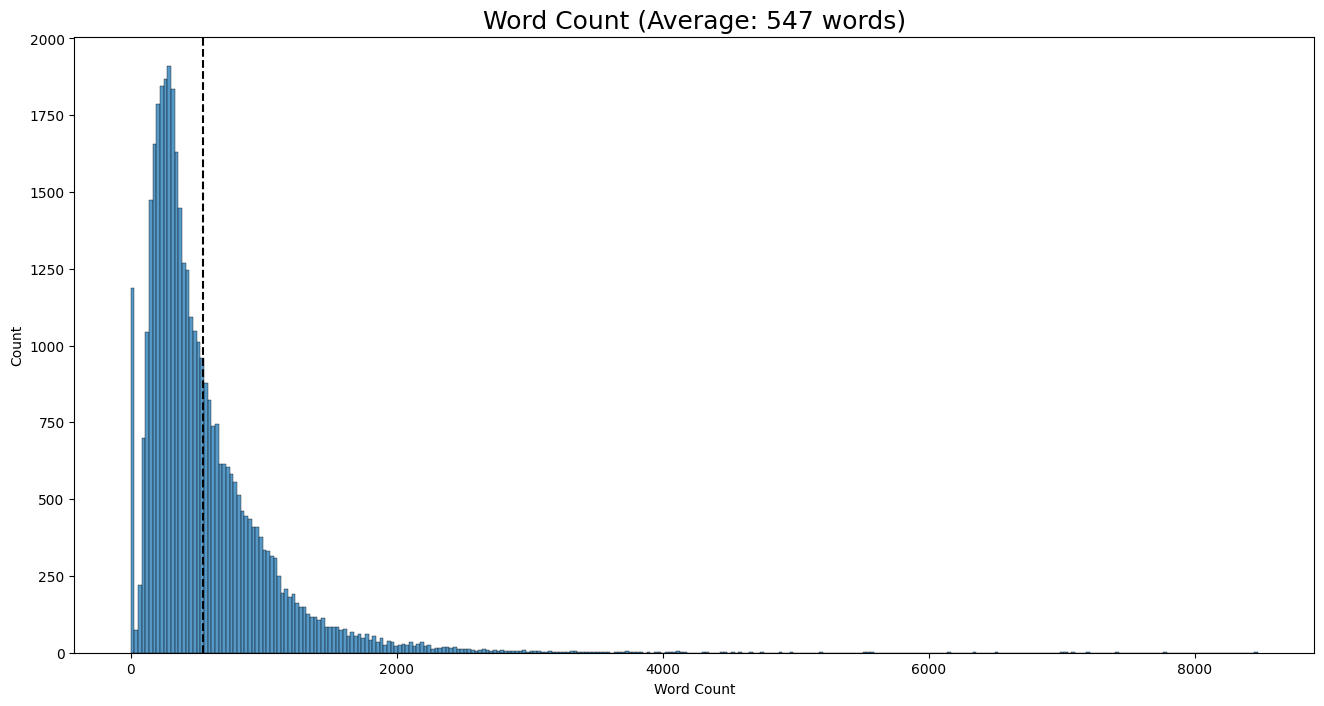

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(16,8))

# Calculate the mean word count
average_word_count = df['n_tokens_content'].mean()

# Add a vertical line indicating the mean word count
plt.axvline(average_word_count, linestyle='--', color='black')

# Plot the histogram of word count
sns.histplot(df['n_tokens_content'])

# Set labels and title
plt.xlabel('Word Count')
plt.title(f'Word Count (Average: {average_word_count:.0f} words)', fontsize=18);

In [23]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

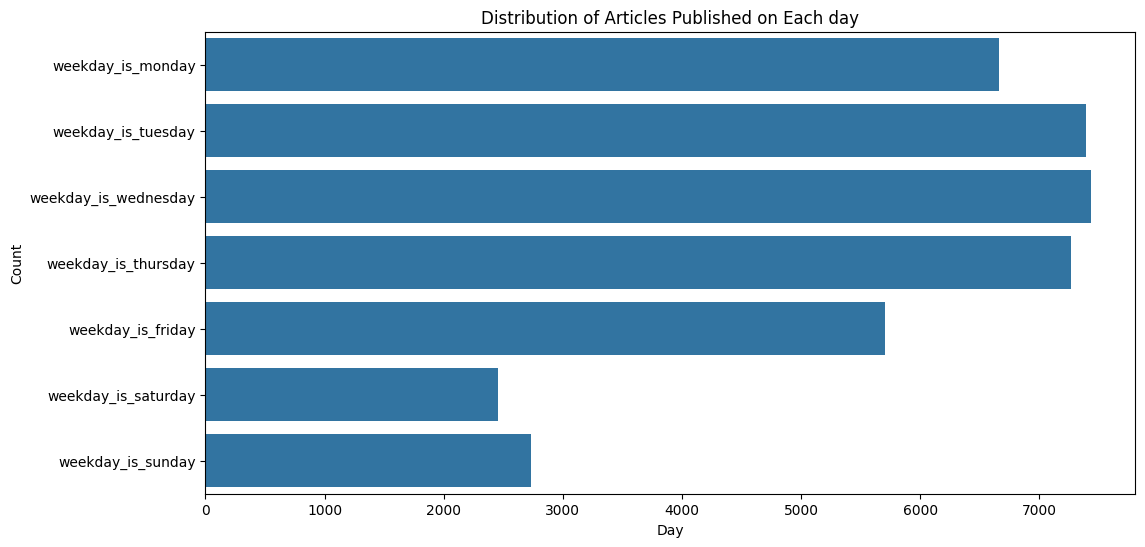

In [24]:
# number of articles published on each day of the week

# List of weekday columns
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
                   'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

# Create a new DataFrame with the sum of articles for each weekday
weekday_counts = df[weekday_columns].sum()

# Create a bar plot for the distribution of articles published on each weekday
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.values, y=weekday_counts.index, orient='h')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Articles Published on Each day')
plt.show()

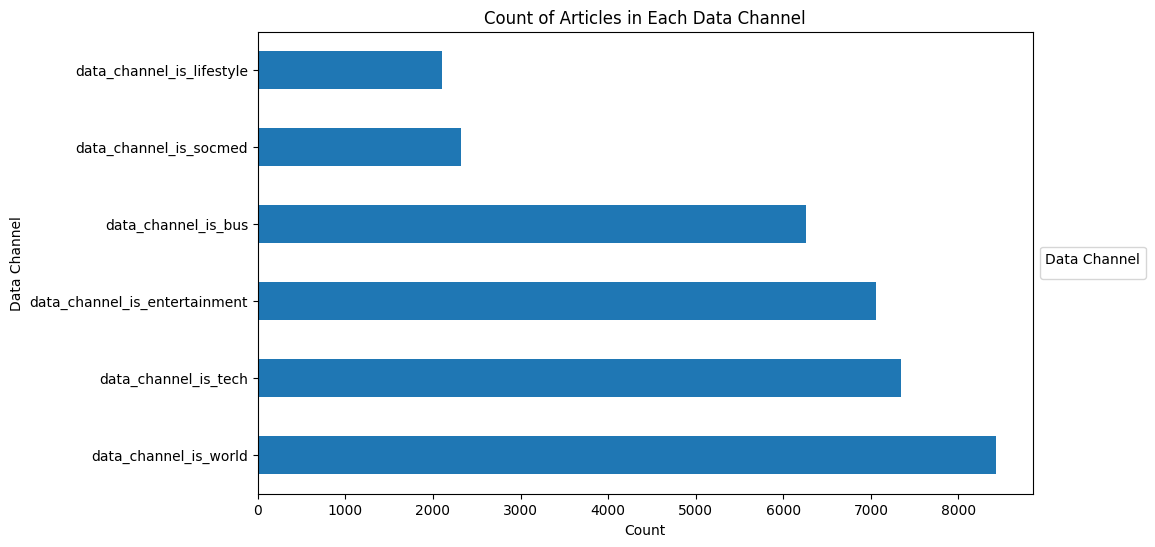

In [25]:
# number of articles published in each data channel

data = df.loc[::,['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
                  'data_channel_is_tech', 'data_channel_is_world']]

# Calculate the count of articles in each data channel
counts = data.sum()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
counts.plot(kind='barh', stacked=True)
plt.ylabel('Data Channel')
plt.xlabel('Count')
plt.title('Count of Articles in Each Data Channel')
plt.legend(title='Data Channel', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Guassian distribution, with a positive skew

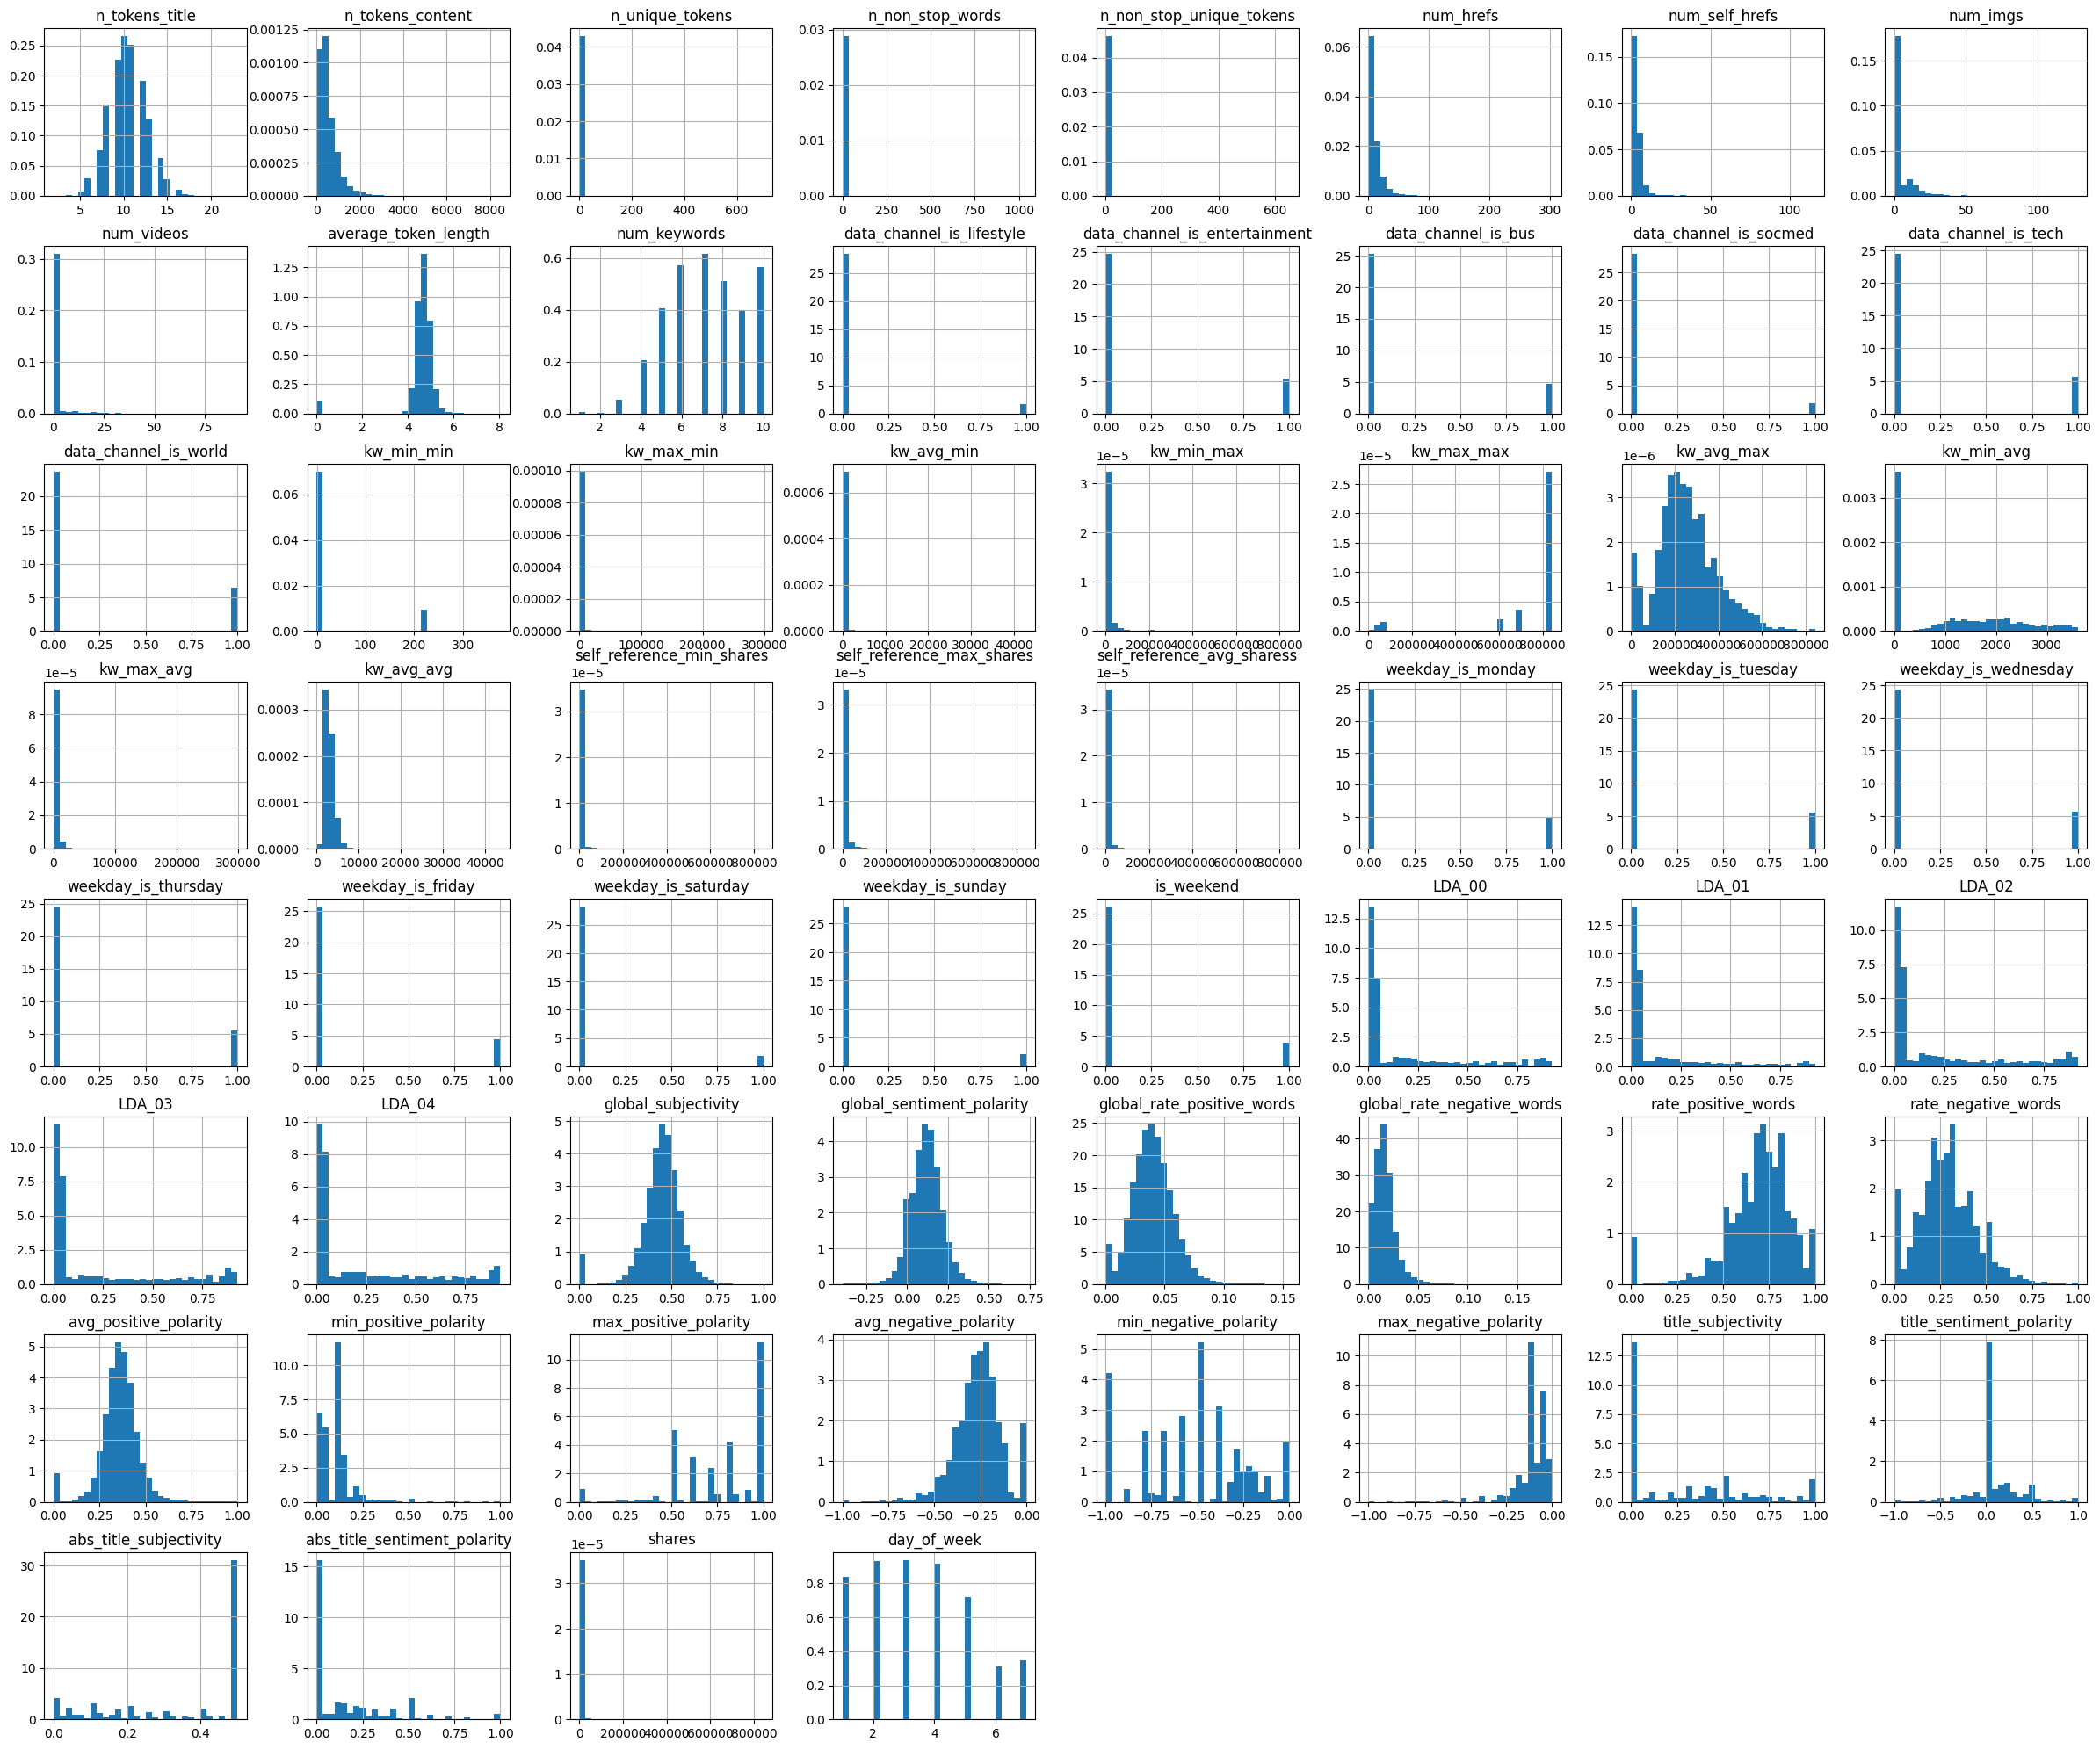

In [26]:
#Visualizing data distribution with histograms

df.hist(bins=30, figsize=(30,25), density=True)
plt.show()

It is seen the that the distribution of the most continous variables in the dataset is Right skewed

Let's have a closer look at the distribution of some of the highly skewed features

1.

Correlation analysis

In [27]:
# Calculate the correlation matrix

# Calculate the correlation  on the full dataset
correlation_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
#mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
upper = correlation_matrix.where(mask)


In [28]:
def show_heatmap(correlation_matrix):
  # Set the figure size (optional)
  plt.figure(figsize=(30, 24))

  # Generate the correlation matrix heatmap
  sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

  # Set the title and labels
  plt.title('Correlation Matrix')
  plt.xlabel('Variables')
  plt.ylabel('Variables')

  # Display the heatmap
  plt.show()

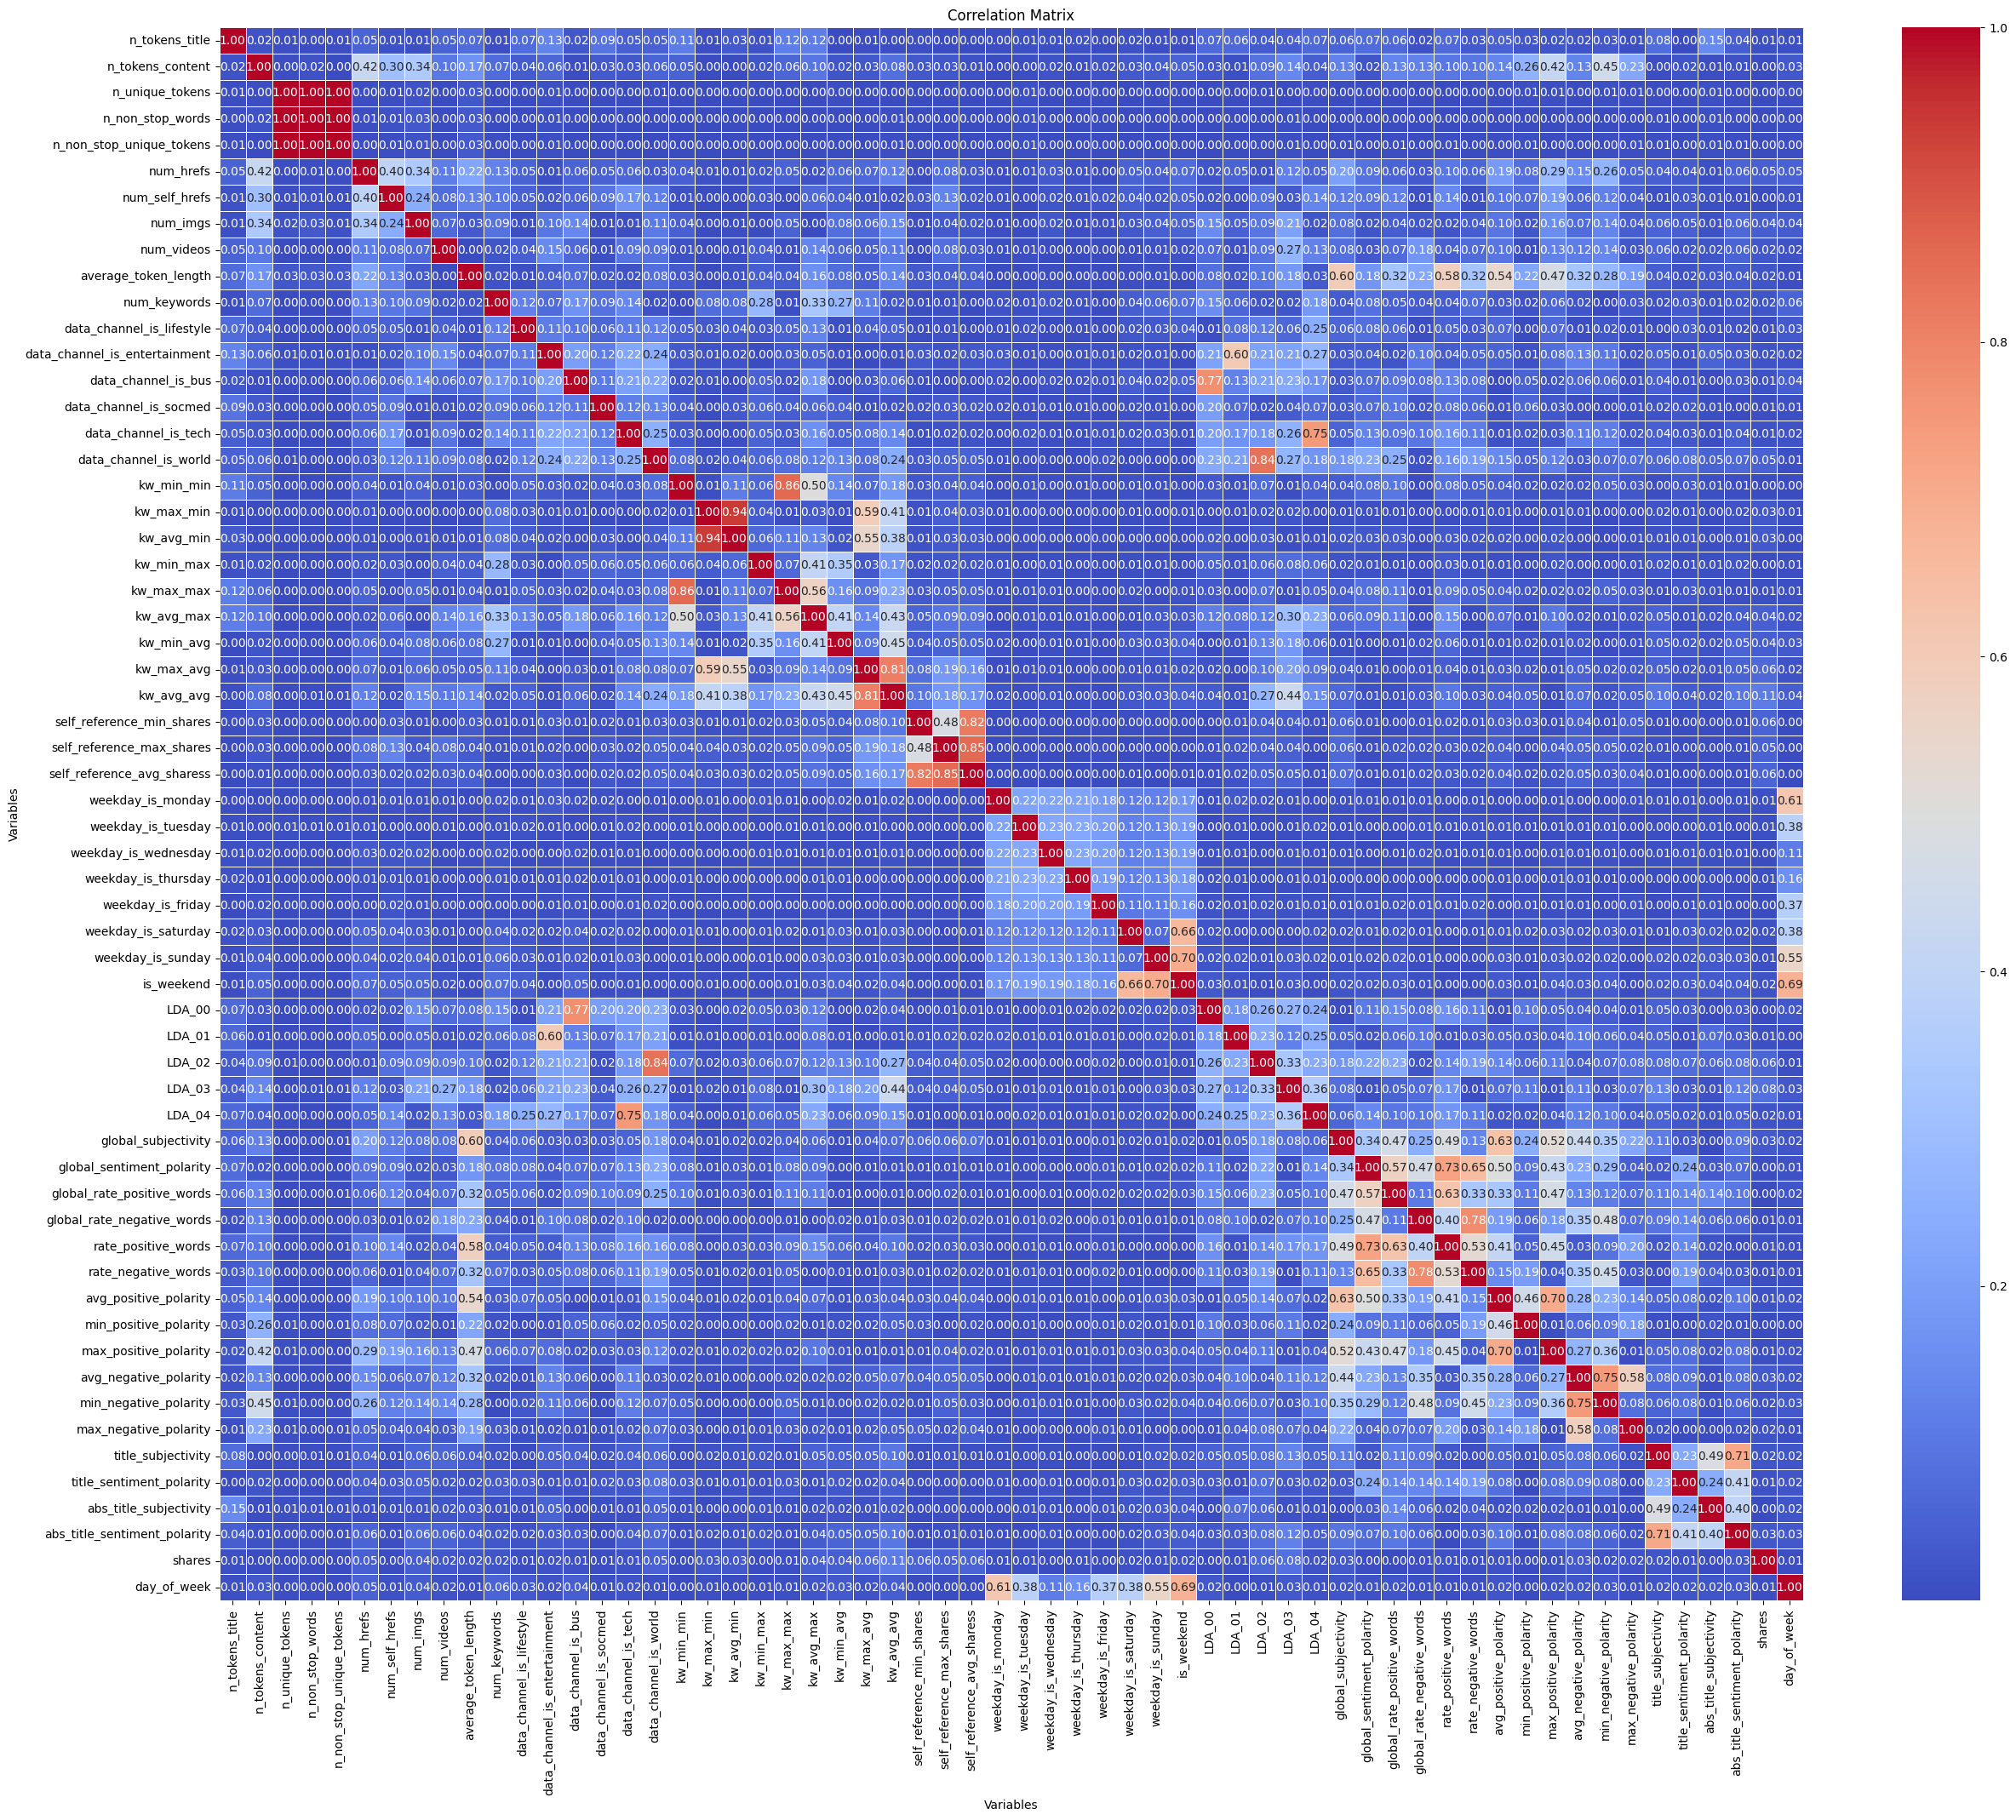

In [29]:
show_heatmap(correlation_matrix)

In [30]:
#get pairs of highly correlated columns

# Stack the data and convert to a DataFrame
correlation_pairs = upper.stack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs with high correlation (e.g., greater than 0.8 or less than -0.8)
highly_correlated_pairs = correlation_pairs[(correlation_pairs['Correlation'].abs() > 0.7) & (correlation_pairs['Feature1'] != correlation_pairs['Feature2'])]
highly_correlated_pairs.sort_values(by='Correlation', ascending=False)

Feature1                      Feature2  Correlation
121              n_unique_tokens      n_non_stop_unique_tokens     0.999852
120              n_unique_tokens              n_non_stop_words     0.999572
178             n_non_stop_words      n_non_stop_unique_tokens     0.999532
928                   kw_max_min                    kw_avg_min     0.940529
888                   kw_min_min                    kw_max_max     0.857226
1270   self_reference_max_shares    self_reference_avg_sharess     0.853480
863        data_channel_is_world                        LDA_02     0.836618
1237   self_reference_min_shares    self_reference_avg_sharess     0.818907
1165                  kw_max_avg                    kw_avg_avg     0.811864
1712  global_rate_negative_words           rate_negative_words     0.779556
726          data_channel_is_bus                        LDA_00     0.774651
821         data_channel_is_tech                        LDA_04     0.749737
1786       avg_negative_polarity         min_negative_polarity     0.748896
1680   global_sentiment_polarity           rate_positive_words     0.727827
1812          title_subjectivity  abs_title_sentiment_polarity     0.714528
1754       avg_positive_polarity         max_positive_polarity     0.703558
1506           weekday_is_sunday                    is_weekend     0.701648

In [31]:
#correlated_cols = []
correlated_cols = correlation_pairs['Feature1'].to_list() + correlation_pairs['Feature2'].to_list()

In [32]:
# drop highly correlated columns threshold = 0.9
# df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [33]:
#understanding target variable distribution
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

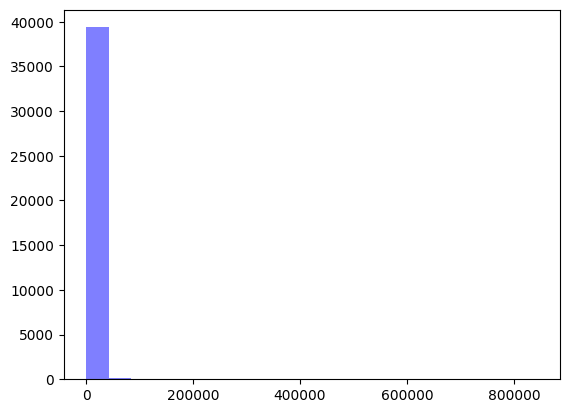

In [34]:
# due to presence of outliers the plot is highly skewed
plt.hist(df['shares'], bins=20, color='blue', alpha=0.5)
plt.show()

Number of shares distribution is heavily right skewed

Median is 1400. Let's use this value to bifurcate the values in the shares column into two categories 0 and 1

- 0 means low popularity
- 1 means high popularity

In [35]:
# creating a binary target column 'popularity'
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

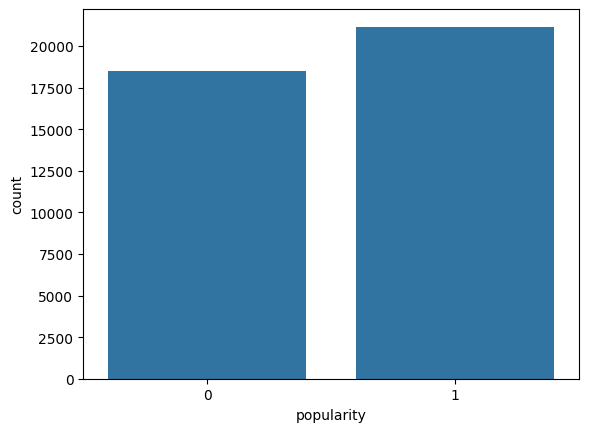

In [36]:
sns.countplot(x='popularity', data=df)
plt.show()

Dataset is more or less balanced now

In [37]:
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   
4              4.682836           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   
4                   1.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                1.0                 0.0   
1                    0.000000                1.0                 0.0   
2                  918.000000                1.0                 0.0   
3                    0.000000                1.0                 0.0   
4                 3151.157895                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday

In [38]:
df['day_of_week']

0        1
1        1
2        1
3        1
4        1
        ..
39639    3
39640    3
39641    3
39642    3
39643    3
Name: day_of_week, Length: 39644, dtype: int64

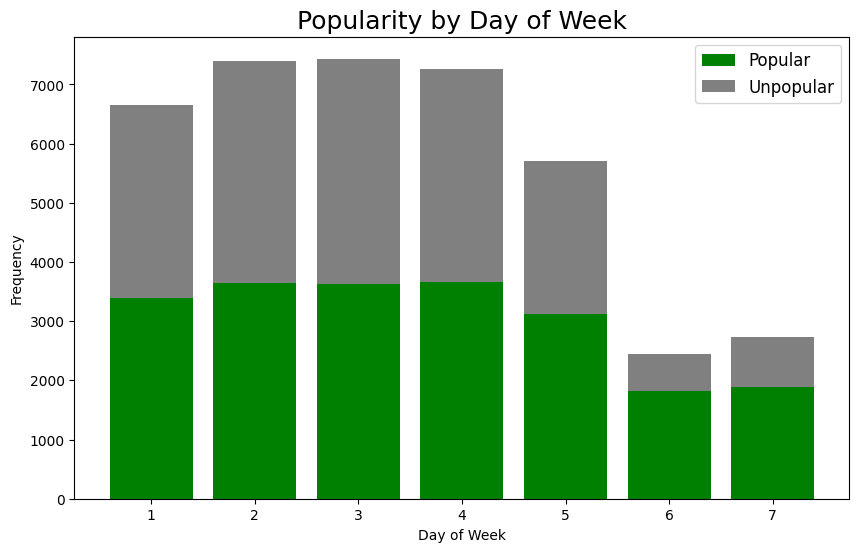

In [39]:
# Calculate the frequencies of occurrences for each category
popularity_counts = df.groupby(['day_of_week', 'popularity']).size().unstack(fill_value=0)

# Plot stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(popularity_counts.index, popularity_counts[1], label='Popular', color='green')
plt.bar(popularity_counts.index, popularity_counts[0], bottom=popularity_counts[1], label='Unpopular', color='grey')

# Add legend and labels
plt.legend(fontsize=12)
plt.title('Popularity by Day of Week', fontsize=18)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

# Show plot
plt.show()


Although number of articles published during weekends is less, higher percentage of articles become popular during weekends than weekdays

In [40]:
#drop shares as its redundant with popularity

# df.drop('shares', axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

Check for outliers

In [42]:
def detect_outliers(df):
  #each record in the outlier dataframe
  outliers_data = []

  #to get the total number of rows to be dropped
  outlier_indices = set()

  for col in df.columns:
      q1_val = df[col].quantile(0.25)    # First Quartile
      q3_val = df[col].quantile(0.75)    # Third Quartile
      IQR_val = q3_val - q1_val                            # Inter Quartile Range

      lower_limit = q1_val - 1.5 * IQR_val                       # Lower Limit
      upper_limit = q3_val + 1.5 * IQR_val                        # Upper Limit

      outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

      outliers_data.append({
          'Column': col,
          'Lower Limit': lower_limit,
          'Upper Limit': upper_limit,
          'IQR': IQR_val,
          'Number of Outliers': len(outliers)
      })
      outlier_indices.update(outliers.index)

  return outliers_data,outlier_indices


In [43]:
outliers_data,outlier_indices = detect_outliers(df)

outliers_df = pd.DataFrame(outliers_data)

#printing only columns with columns with outliers
outliers_df[outliers_df['Number of Outliers']>0].sort_values(by='Number of Outliers', ascending=False)

Column    Lower Limit    Upper Limit           IQR  \
21                     kw_max_max  843300.000000  843300.000000  0.000000e+00   
16          data_channel_is_world       0.000000       0.000000  0.000000e+00   
7                        num_imgs      -3.500000       8.500000  3.000000e+00   
55       title_sentiment_polarity      -0.225000       0.375000  1.500000e-01   
31           weekday_is_wednesday       0.000000       0.000000  0.000000e+00   
30             weekday_is_tuesday       0.000000       0.000000  0.000000e+00   
15           data_channel_is_tech       0.000000       0.000000  0.000000e+00   
32            weekday_is_thursday       0.000000       0.000000  0.000000e+00   
12  data_channel_is_entertainment       0.000000       0.000000  0.000000e+00   
29              weekday_is_monday       0.000000       0.000000  0.000000e+00   
13            data_channel_is_bus       0.000000       0.000000  0.000000e+00   
38                         LDA_01      -0.163716       0.339560  1.258190e-01   
33              weekday_is_friday       0.000000       0.000000  0.000000e+00   
37                         LDA_00      -0.298811       0.564819  2.159075e-01   
36                     is_weekend       0.000000       0.000000  0.000000e+00   
20                     kw_min_max  -11850.000000   19750.000000  7.900000e+03   
26      self_reference_min_shares   -2302.500000    5541.500000  1.961000e+03   
17                     kw_min_min      -8.500000      11.500000  5.000000e+00   
58                         shares   -1835.000000    5581.000000  1.854000e+03   
28     self_reference_avg_sharess   -5347.031250   11528.218750  4.218812e+03   
27      self_reference_max_shares   -9250.000000   18350.000000  6.900000e+03   
18                     kw_max_min    -387.500000    1832.500000  5.550000e+02   
39                         LDA_02      -0.429898       0.792688  3.056465e-01   
49          min_positive_polarity      -0.025000       0.175000  5.000000e-02   
8                      num_videos      -1.500000       2.500000  1.000000e+00   
3                n_non_stop_words       1.000000       1.000000  4.314000e-09   
35              weekday_is_sunday       0.000000       0.000000  0.000000e+00   
53          max_negative_polarity      -0.237500       0.062500  7.500000e-02   
34            weekday_is_saturday       0.000000       0.000000  0.000000e+00   
24                     kw_max_avg    -124.676875    9706.732474  2.457852e+03   
14         data_channel_is_socmed       0.000000       0.000000  0.000000e+00   
5                       num_hrefs     -11.000000      29.000000  1.000000e+01   
11      data_channel_is_lifestyle       0.000000       0.000000  0.000000e+00   
48          avg_positive_polarity       0.148467       0.569204  1.051843e-01   
6                  num_self_hrefs      -3.500000       8.500000  3.000000e+00   
19                     kw_avg_min    -181.125000     679.875000  2.152500e+02   
1                n_tokens_content    -459.000000    1421.000000  4.700000e+02   
42            global_subjectivity       0.227917       0.676583  1.121667e-01   
4        n_non_stop_unique_tokens       0.432404       0.947965  1.288902e-01   
9            average_token_length       3.913752       5.419491  3.764347e-01   
57   abs_title_sentiment_polarity      -0.375000       0.625000  2.500000e-01   
25                     kw_avg_avg     555.777067    5426.901062  1.217781e+03   
2                 n_unique_tokens       0.264133       0.815433  1.378252e-01   
46            rate_positive_words       0.300000       1.100000  2.000000e-01   
45     global_rate_negative_words      -0.008570       0.039925  1.212375e-02   
40                         LDA_03      -0.492215       0.896549  3.471911e-01   
22                     kw_avg_max  -64352.812500  568179.687500  1.581331e+05   
51          avg_negative_polarity      -0.540599       0.025312  1.414778e-01   
43      global_sentiment_polarity      -0.122355       0.3

In [44]:
num_rows_to_drop = len(outlier_indices)
print("Number of unique rows to drop:", num_rows_to_drop)

Number of unique rows to drop: 39644


Now, among very highly correlated columns, it makes sense to drop the ones with higher number of outliers

---



In [45]:
highly_correlated_pairs.columns

Index(['Feature1', 'Feature2', 'Correlation'], dtype='object')

In [46]:
columns_to_drop = []  # Initialize a list to store columns to drop

# Iterate through each highly correlated pair
for index, row in highly_correlated_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    # Find the row in outliers_df corresponding to each column
    row1 = outliers_df[outliers_df['Column'] == feature1]
    row2 = outliers_df[outliers_df['Column'] == feature2]

    # If either row1 or row2 is empty, skip
    if row1.empty or row2.empty:
        continue

    # Get the number of outliers for each column
    outliers_count1 = row1['Number of Outliers'].iloc[0]
    outliers_count2 = row2['Number of Outliers'].iloc[0]

    # Identify the column with the highest number of outliers

    if outliers_count1 > outliers_count2:
        columns_to_drop.append(feature1)
    else:
        if outliers_count2 > outliers_count1:
          columns_to_drop.append(feature2)

# Remove duplicate columns (in case both columns in a pair are to be dropped)
columns_to_drop = list(set(columns_to_drop))



In [47]:
columns_to_drop

['kw_max_avg',
 'global_rate_negative_words',
 'data_channel_is_tech',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'kw_max_min',
 'rate_positive_words',
 'avg_positive_polarity',
 'data_channel_is_world',
 'kw_max_max',
 'abs_title_sentiment_polarity',
 'self_reference_avg_sharess',
 'is_weekend',
 'data_channel_is_bus',
 'self_reference_min_shares',
 'avg_negative_polarity']

In [48]:
len(columns_to_drop)

16

In [49]:
highly_correlated_pairs

Feature1                      Feature2  Correlation
120              n_unique_tokens              n_non_stop_words     0.999572
121              n_unique_tokens      n_non_stop_unique_tokens     0.999852
178             n_non_stop_words      n_non_stop_unique_tokens     0.999532
726          data_channel_is_bus                        LDA_00     0.774651
821         data_channel_is_tech                        LDA_04     0.749737
863        data_channel_is_world                        LDA_02     0.836618
888                   kw_min_min                    kw_max_max     0.857226
928                   kw_max_min                    kw_avg_min     0.940529
1165                  kw_max_avg                    kw_avg_avg     0.811864
1237   self_reference_min_shares    self_reference_avg_sharess     0.818907
1270   self_reference_max_shares    self_reference_avg_sharess     0.853480
1506           weekday_is_sunday                    is_weekend     0.701648
1680   global_sentiment_polarity           rate_positive_words     0.727827
1712  global_rate_negative_words           rate_negative_words     0.779556
1754       avg_positive_polarity         max_positive_polarity     0.703558
1786       avg_negative_polarity         min_negative_polarity     0.748896
1812          title_subjectivity  abs_title_sentiment_polarity     0.714528

In [50]:
# Initialize a list to store pairs of highly correlated columns without outliers
correlated_columns_no_outliers = []

# Iterate through each highly correlated pair
for index, row in highly_correlated_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    # Check if either column is in the columns_to_drop list
    if feature1 not in columns_to_drop and feature2 not in columns_to_drop:
        correlated_columns_no_outliers.append((feature1, feature2))

print("Highly correlated columns with no outliers:")
print(correlated_columns_no_outliers)


Highly correlated columns with no outliers:
[]


In [51]:
# Drop the columns with the highest number of outliers from the first DataFrame
# df.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop

['kw_max_avg',
 'global_rate_negative_words',
 'data_channel_is_tech',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'kw_max_min',
 'rate_positive_words',
 'avg_positive_polarity',
 'data_channel_is_world',
 'kw_max_max',
 'abs_title_sentiment_polarity',
 'self_reference_avg_sharess',
 'is_weekend',
 'data_channel_is_bus',
 'self_reference_min_shares',
 'avg_negative_polarity']

**Drop highly correlated, less useful columns**

We will drop these columns that are highly correlated with another column in the datframe. Exception is made for data_channel_is_bus,data_channel_is_world, data_channel_is_tech' because these features are more interpretable in real-world scenario and also their distribution is clearly categorical(0 or 1) as opposed to LDA_00, LDA_02 and LDA_04

We have also considered the correlation heatmap(manual check). Let's say if a feature is highly correlated with two other features(that are not correlated), then that particular feature should be dropped than the other two features.

In [52]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [53]:
# updated columns to drop
columns_to_drop = ['self_reference_avg_sharess',
 'kw_max_min',
 'avg_positive_polarity',
 'abs_title_sentiment_polarity',
 'global_rate_negative_words',
 'n_non_stop_words',
 'self_reference_min_shares',
 'is_weekend',
 'kw_max_avg',
 'avg_negative_polarity',
 'rate_positive_words',
 'kw_max_max',
 'n_non_stop_unique_tokens',
 'LDA_00',
 'LDA_02',
 'LDA_04'
 ]

In [54]:
df.drop(columns_to_drop, inplace=True, axis=1)

In [55]:
# we will also drop shares column as we have categorized it already
df.drop('shares', axis=1, inplace=True)

In [56]:
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens     num_hrefs  \
count    39644.000000      39644.000000     39644.000000  39644.000000   
mean        10.398749        546.514731         0.548216     10.883690   
std          2.114037        471.107508         3.520708     11.332017   
min          2.000000          0.000000         0.000000      0.000000   
25%          9.000000        246.000000         0.470870      4.000000   
50%         10.000000        409.000000         0.539226      8.000000   
75%         12.000000        716.000000         0.608696     14.000000   
max         23.000000       8474.000000       701.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    39644.000000  39644.000000  39644.000000          39644.000000   
mean         3.293638      4.544143      1.249874              4.548239   
std          3.855141      8.309434      4.107855              0.844406   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.478404   
50%          3.000000      1.000000      0.000000              4.664082   
75%          4.000000      4.000000      1.000000              4.854839   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  39644.000000               39644.000000                   39644.000000   
mean       7.223767                   0.052946                       0.178009   
std        1.909130                   0.223929                       0.382525   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min    kw_avg_min     kw_min_max  \
count           39644.000000  39644.000000  39644.000000   39644.000000   
mean                0.212567     26.106801    312.366967   13612.354102   
std                 0.409129     69.633215    620.783887   57986.029357   
min                 0.000000     -1.000000     -1.000000       0.000000   
25%                 0.000000     -1.000000    141.750000       0.000000   
50%                 0.000000     -1.000000    235.500000    1400.000000   
75%                 0.000000      4.000000    357.000000    7900.000000   
max                 1.000000    377.000000  42827.857143  843300.000000   

          kw_avg_max    kw_min_avg    kw_avg_avg  self_reference_max_shares  \
count   39644.000000  39644.000000  39644.000000               39644.000000   
mean   259281.938083   1117.146610   3135.858639               10329.212662   
std    135102.247285   1137.456951   1318.150397               41027.576613   
min         0.000000     -1.000000      0.000000                   0.000000   
25%    172846.875000      0.000000   2382.448566                1100.000000   
50%    244572.222223   1023.635611   2870.074878                2800.000000   
75%    330980.000000

In [57]:
df.drop('day_of_week', inplace=True, axis=1)

In [58]:
cat_cols = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed',	'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday',	'weekday_is_tuesday',
            'weekday_is_wednesday',	'weekday_is_thursday',	'weekday_is_friday',	'weekday_is_saturday',	'weekday_is_sunday']

In [59]:
num_cols=[]

for col in df.columns:
  if col not in cat_cols:
    num_cols.append(col)


In [60]:
df2 = df.copy()

Applying cbrt transformation

In [61]:
import numpy as np

# Assuming num_cols contains the names of numeric columns in your DataFrame
skewed_cols = []  # List to store names of skewed columns

# Step 1: Identify positively skewed columns
for col in num_cols:
    skewness = df2[col].skew()
    if skewness > 0.5:  # Adjust threshold as needed
        skewed_cols.append(col)

# Step 2: Apply cube root transformation to positively skewed columns
for col in skewed_cols:
    if (df2[col] >= 0).all():  # Check if all values in the column are positive
        df2[col] = np.cbrt(df2[col])

# Note: Adjust the threshold for skewness as needed based on your data.


In [62]:
# Assuming num_cols contains the names of numeric columns in your DataFrame
skewed_cols = []  # List to store names of skewed columns

# Step 1: Identify skewed columns
for col in num_cols:
    skewness = df2[col].skew()
    if abs(skewness) > 0.5:  # Adjust threshold as needed
        skewed_cols.append(col)

# Step 2 & 3: Apply log transformation to skewed columns with positive values
for col in skewed_cols:
    if (df2[col] > 0).all():  # Check if all values in the column are positive
        df2[col] = np.log(df2[col])

# Note: Adjust the threshold for skewness as needed based on your data.


In [63]:
skewed_cols

['num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'kw_min_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_avg_max',
 'self_reference_max_shares',
 'LDA_01',
 'LDA_03',
 'global_subjectivity',
 'min_positive_polarity',
 'max_positive_polarity',
 'max_negative_polarity',
 'abs_title_subjectivity']

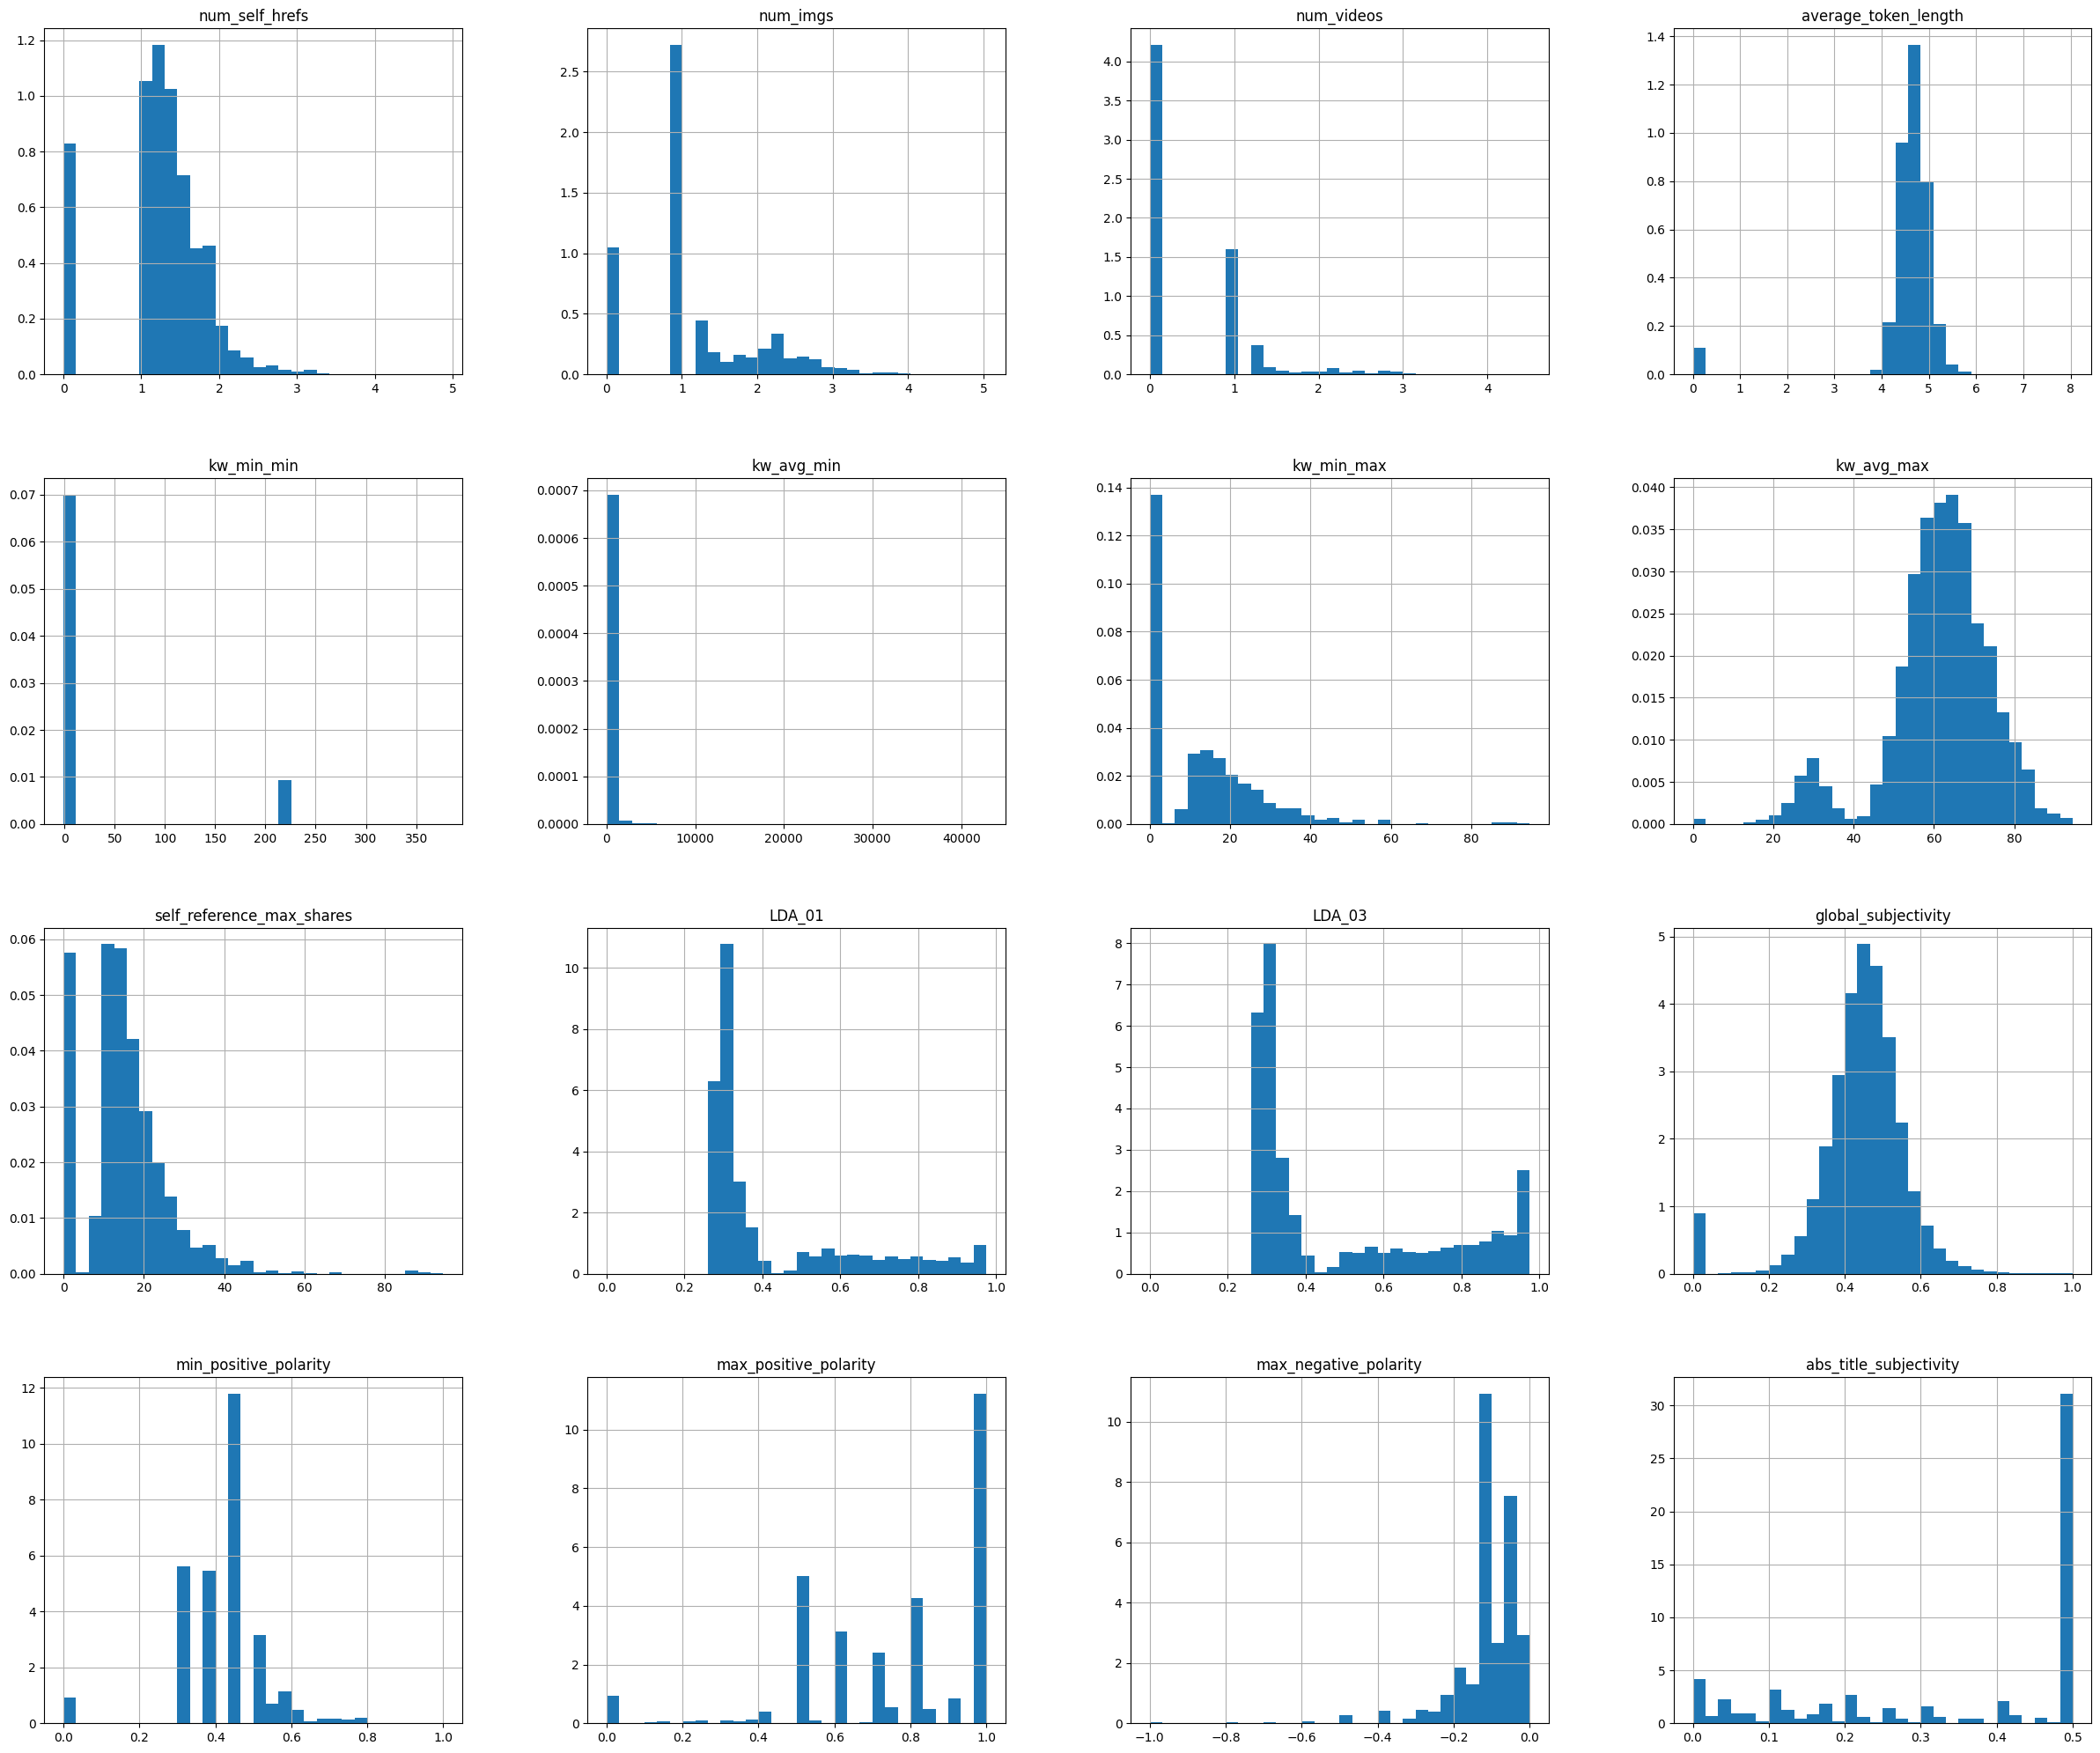

In [64]:
df2[skewed_cols].hist(bins=30, figsize=(30,25), density=True) #after transformation
plt.show()

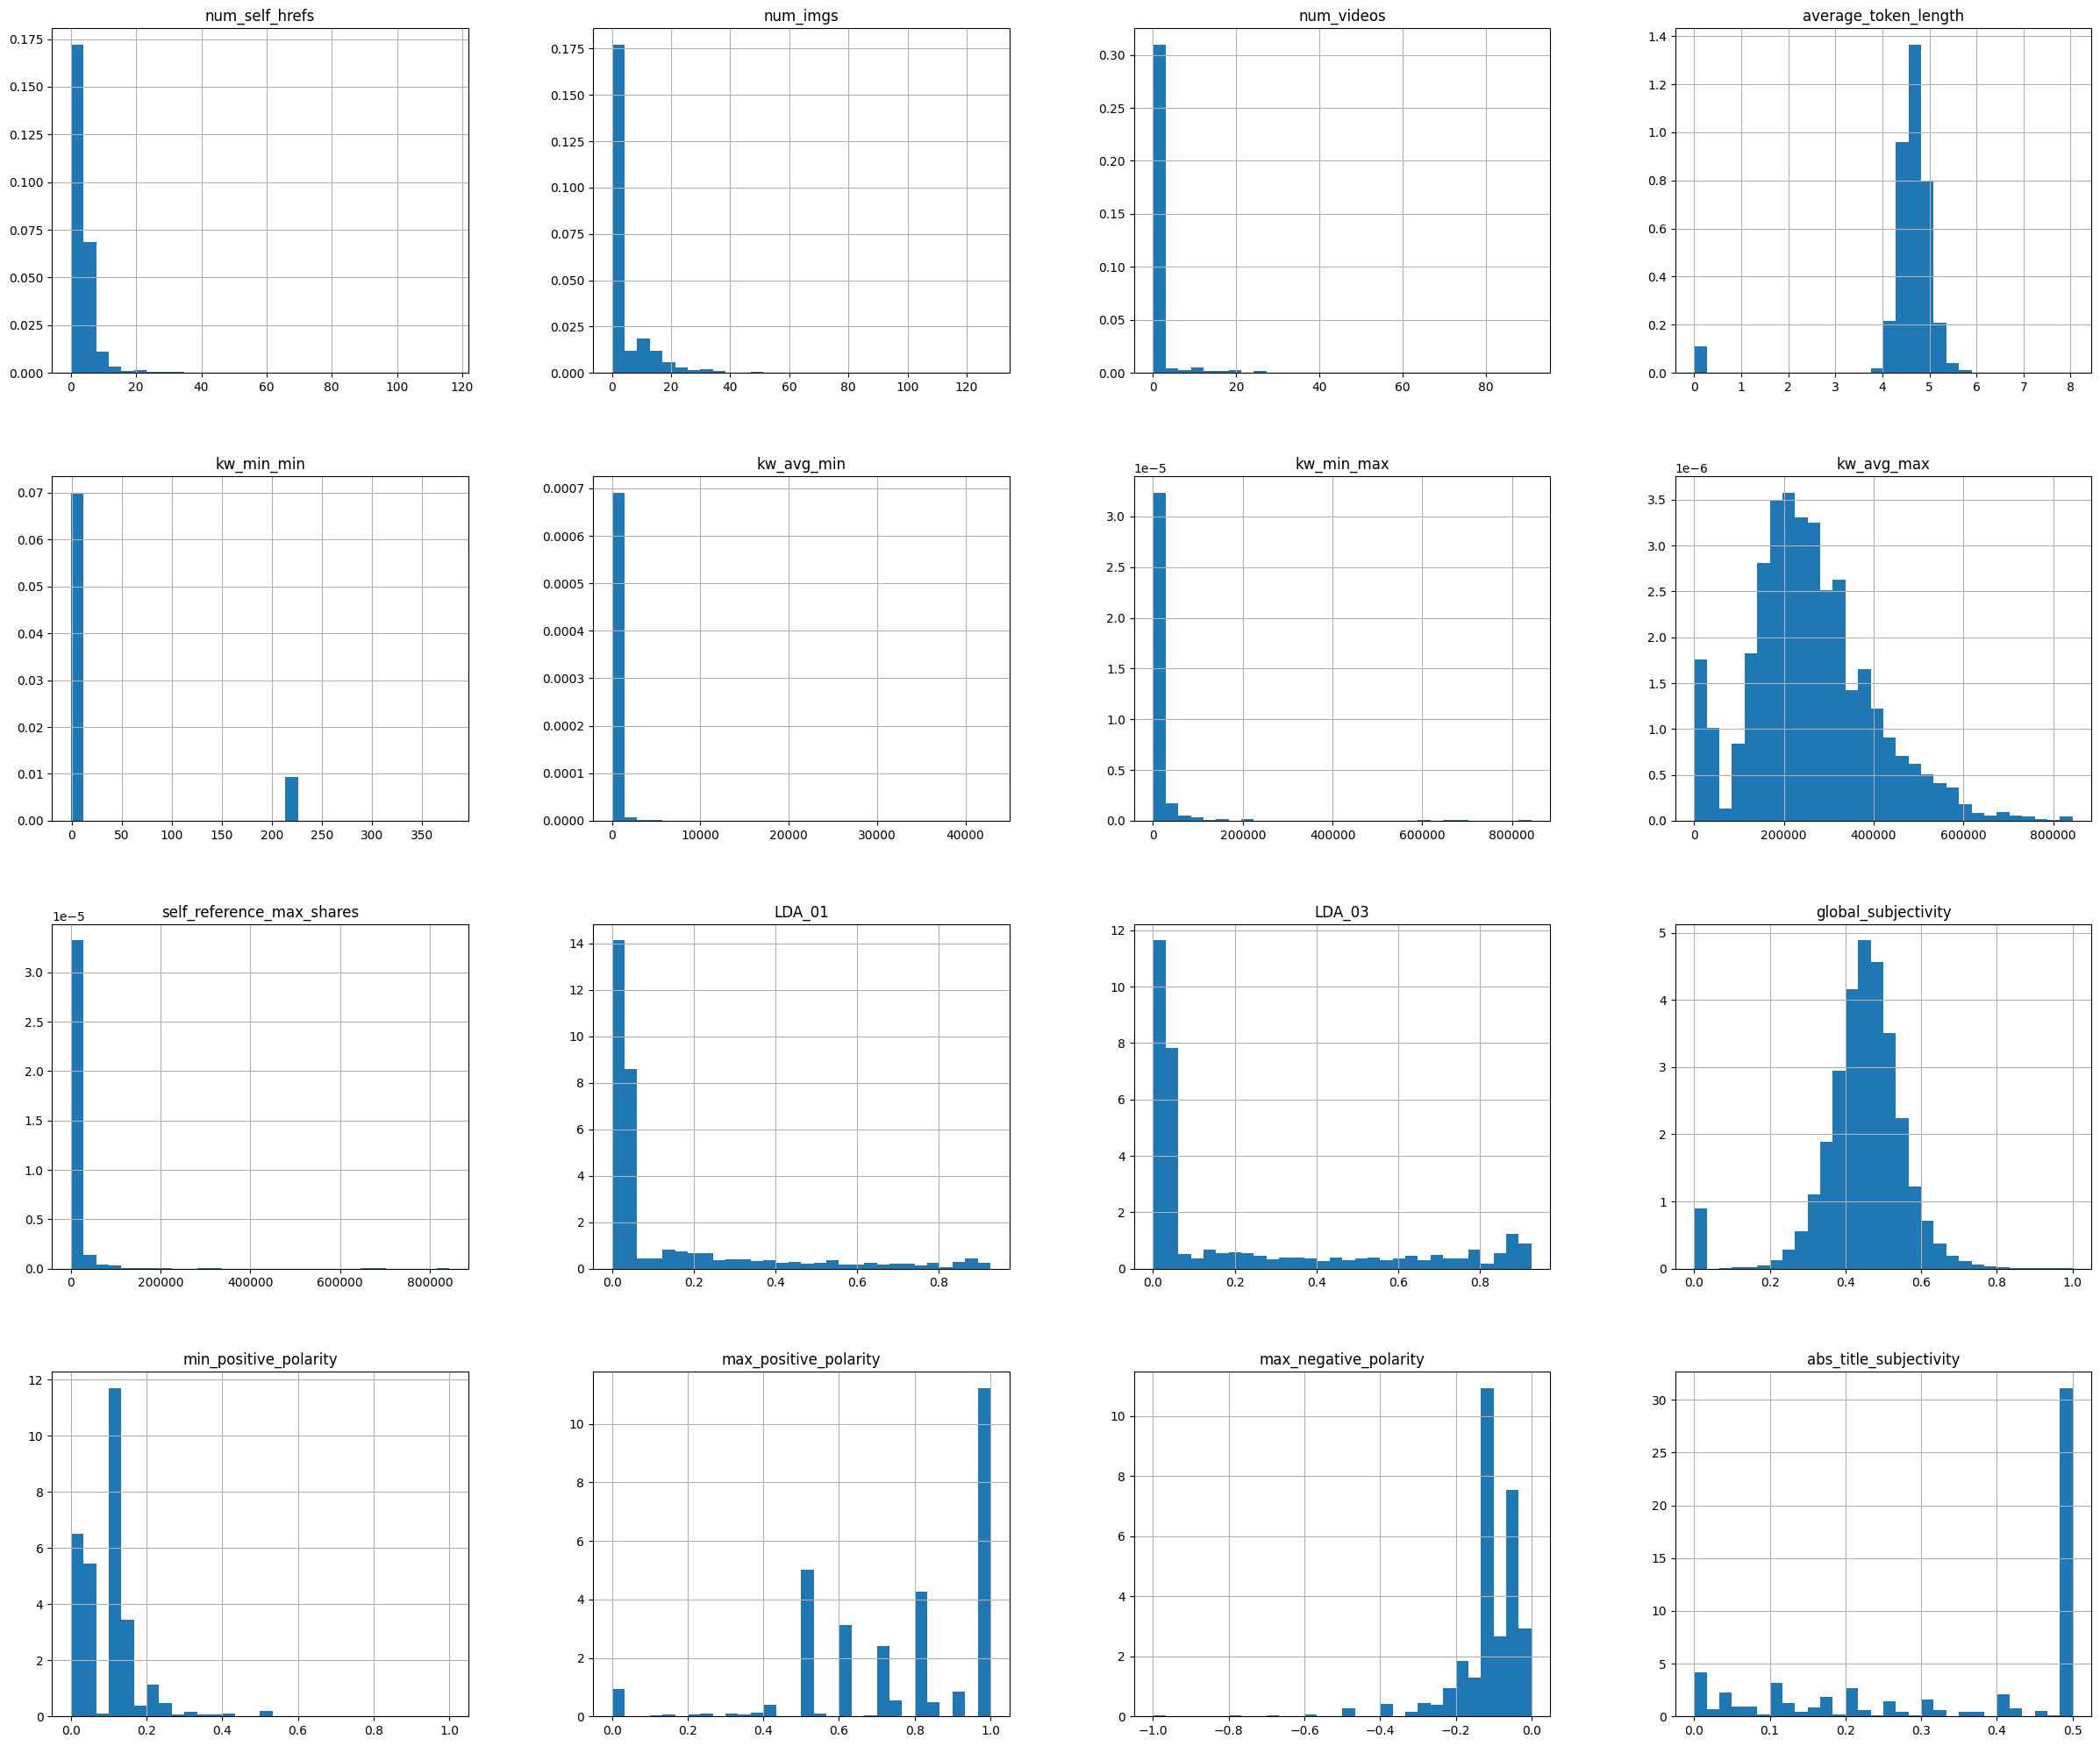

In [65]:
df[skewed_cols].hist(bins=30, figsize=(30,25), density=True) #original dist
plt.show()

In [66]:
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'LDA_01', 'LDA_03', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'popularity'],
    

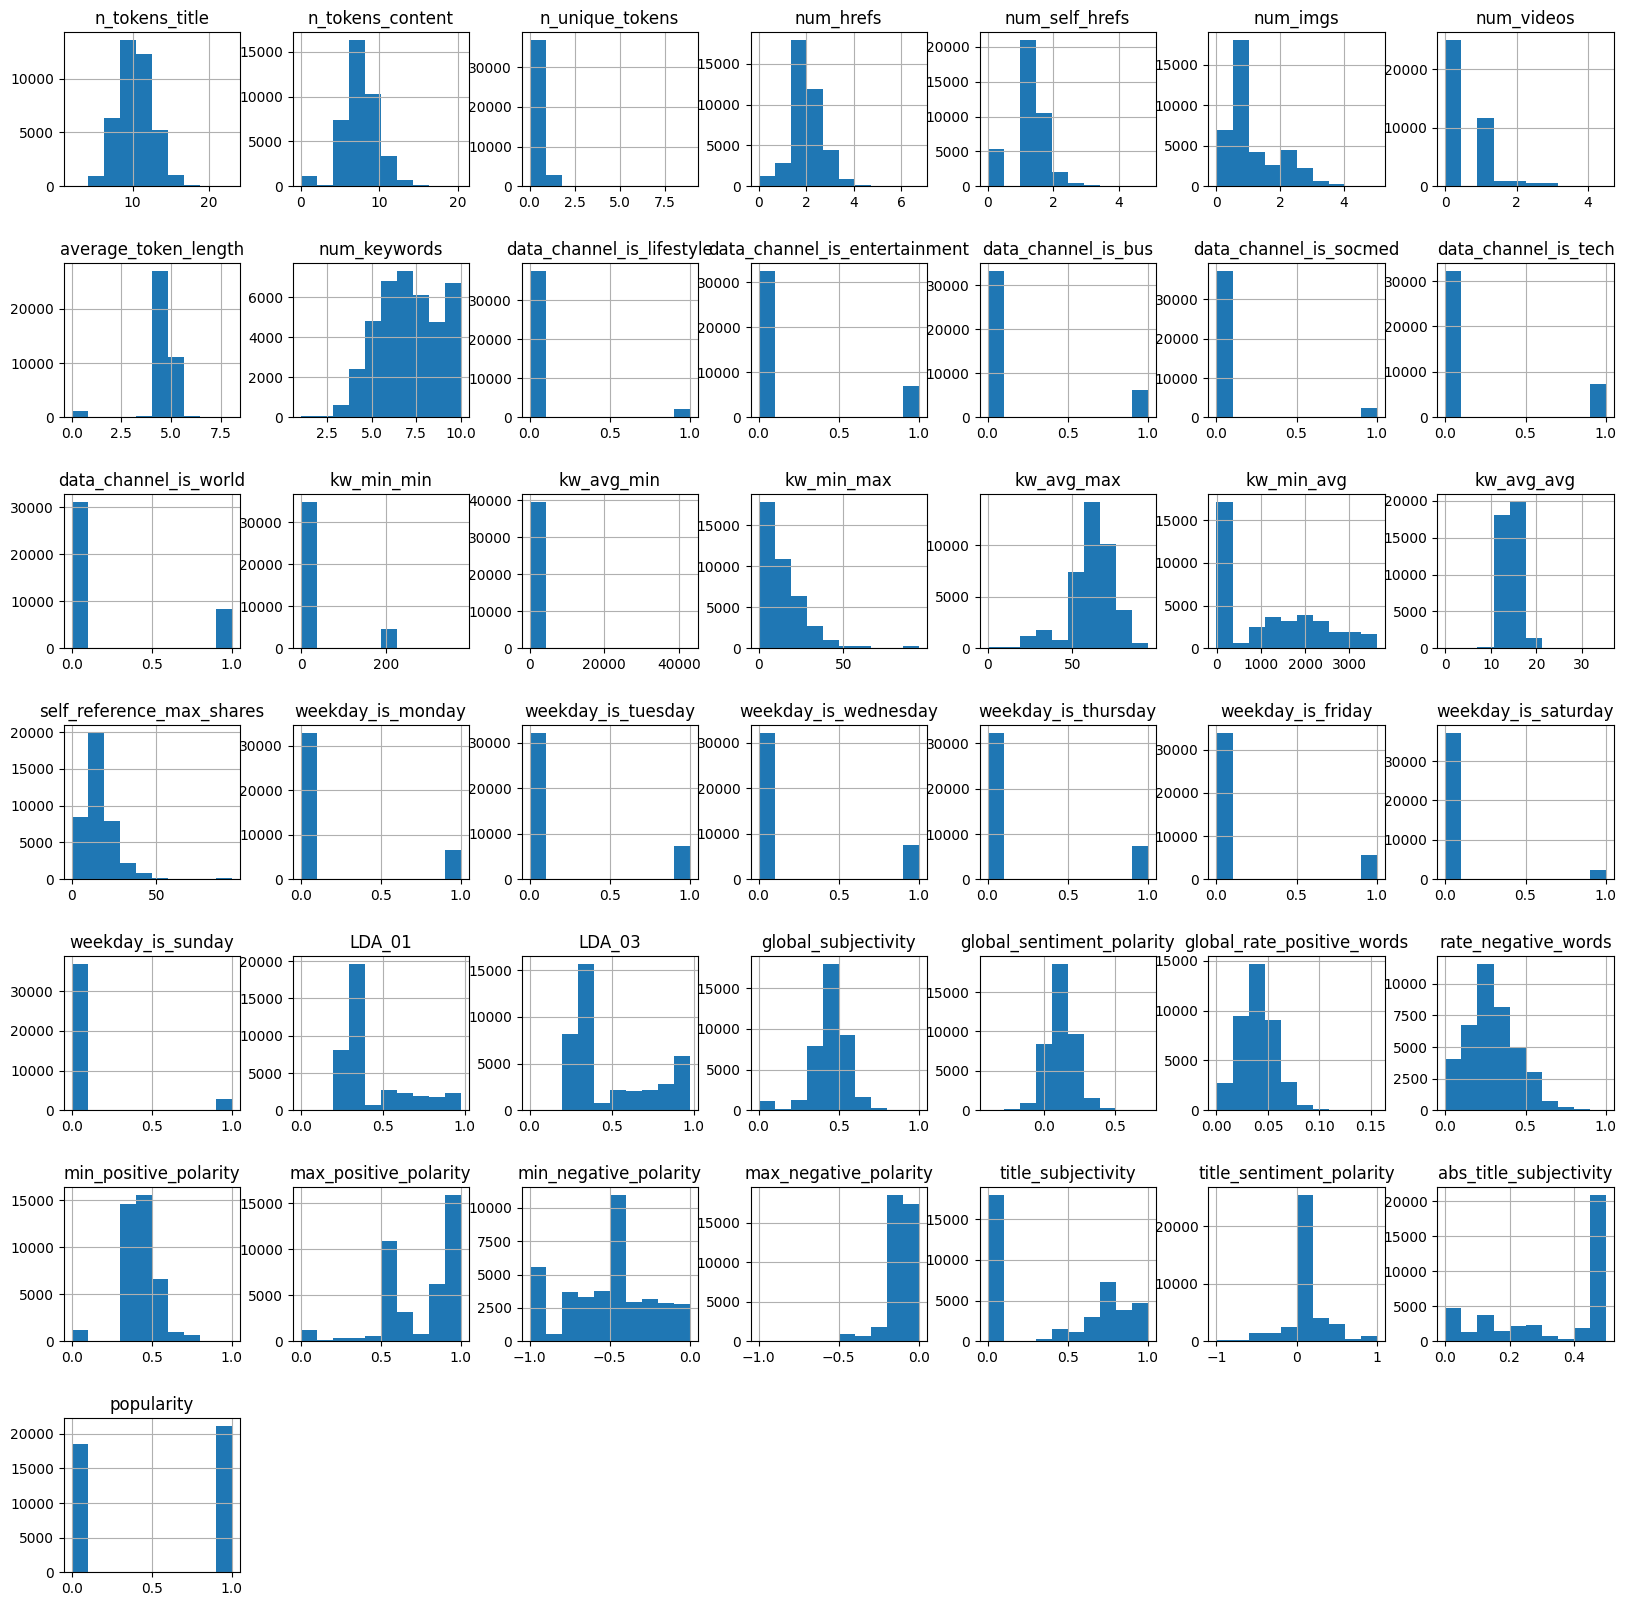

In [67]:
df2.hist(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.show()

In [68]:
df2['kw_min_max_spread'] = df2['kw_min_max'] - df2['kw_min_min']
df2['kw_avg_spread'] = df2['kw_avg_max'] - df2['kw_avg_min']


df2['average_token_length_times_num_keywords'] = df2['average_token_length'] * df2['num_keywords']

df2['average_lda_topic_score'] = (df2['LDA_01'] + df2['LDA_03']) / 2

df2['average_positive_polarity'] = (df2['min_positive_polarity'] + df2['max_positive_polarity']) / 2

df2['average_negative_polarity'] = (df2['min_negative_polarity'] + df2['max_negative_polarity']) / 2


df2 = df2.drop(['kw_min_max', 'kw_min_min', 'kw_avg_max', 'kw_avg_min',
              'n_tokens_title', 'n_tokens_content', 'num_hrefs','LDA_01','LDA_03',
              'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
              'num_keywords','min_positive_polarity','max_positive_polarity','min_negative_polarity','max_negative_polarity'], axis=1)


In [69]:
max_values = df2.max()
print(max_values)


n_unique_tokens                               8.883266
data_channel_is_lifestyle                     1.000000
data_channel_is_entertainment                 1.000000
data_channel_is_bus                           1.000000
data_channel_is_socmed                        1.000000
data_channel_is_tech                          1.000000
data_channel_is_world                         1.000000
kw_min_avg                                 3613.039819
kw_avg_avg                                   35.187473
self_reference_max_shares                    94.477277
weekday_is_monday                             1.000000
weekday_is_tuesday                            1.000000
weekday_is_wednesday                          1.000000
weekday_is_thursday                           1.000000
weekday_is_friday                             1.000000
weekday_is_saturday                           1.000000
weekday_is_sunday                             1.000000
global_subjectivity                           1.000000
global_sen

1. **kw_min_max_spread**: This feature represents the spread between the minimum and maximum keyword occurrences in the content. It indicates the range of keyword occurrences, which may reflect the diversity or focus of the content.

2. **kw_avg_spread**: Similar to kw_min_max_spread, this feature represents the spread between the average minimum and maximum keyword occurrences. It provides another perspective on the distribution of keyword occurrences in the content.

3. **num_links_to_content_length**: This feature represents the ratio of the number of links to other content (e.g., articles, websites) in the content to the content length. It reflects the richness of external references in the content.

4. **num_self_links_to_content_length**: This feature represents the ratio of the number of links to other content within the same website or domain to the content length. It indicates the internal linking structure within the content.

5. **average_token_length_times_num_keywords**: This feature represents the product of the average token length in the content and the number of keywords. It provides a measure of the overall complexity or informativeness of the content.

6. **average_lda_topic_score**: This feature represents the average score of two LDA topics (LDA_01 and LDA_03). LDA (Latent Dirichlet Allocation) is a topic modeling technique used to discover the topics that are present in a corpus of text. This feature reflects the overall topic distribution in the content.

7. **average_positive_polarity**: This feature represents the average positive polarity score, which is a measure of the sentiment polarity (positivity) of the content. It indicates the overall positivity of the content.

8. **average_negative_polarity**: This feature represents the average negative polarity score, which is a measure of the sentiment polarity (negativity) of the content. It indicates the overall negativity of the content.


In [70]:
df2=df2.dropna()

In [71]:
df2.isna().sum()

n_unique_tokens                            0
data_channel_is_lifestyle                  0
data_channel_is_entertainment              0
data_channel_is_bus                        0
data_channel_is_socmed                     0
data_channel_is_tech                       0
data_channel_is_world                      0
kw_min_avg                                 0
kw_avg_avg                                 0
self_reference_max_shares                  0
weekday_is_monday                          0
weekday_is_tuesday                         0
weekday_is_wednesday                       0
weekday_is_thursday                        0
weekday_is_friday                          0
weekday_is_saturday                        0
weekday_is_sunday                          0
global_subjectivity                        0
global_sentiment_polarity                  0
global_rate_positive_words                 0
rate_negative_words                        0
title_subjectivity                         0
title_sent

In [72]:
df2['n_unique_tokens']

0        0.872236
1        0.845649
2        0.831614
3        0.795700
4        0.746290
           ...   
39639    0.808784
39640    0.886335
39641    0.802262
39642    0.814070
39643    0.888743
Name: n_unique_tokens, Length: 39644, dtype: float64

(array([3.6903e+04, 2.7400e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.88832661, 1.77665322, 2.66497984, 3.55330645,
        4.44163306, 5.32995967, 6.21828628, 7.1066129 , 7.99493951,
        8.88326612]),
 <BarContainer object of 10 artists>)

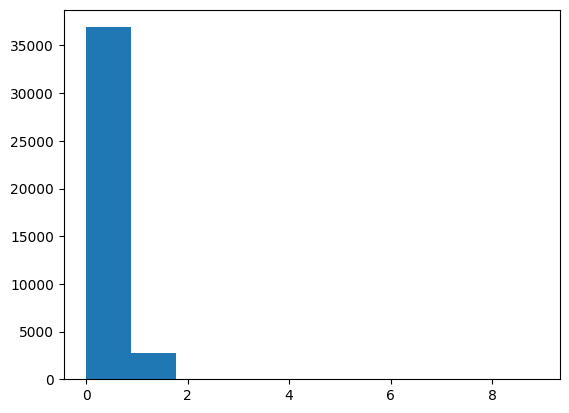

In [73]:
plt.hist(df2['n_unique_tokens'])

Feature selection based on statistical tests



#Why Krusal Wallis Test Not ANOVA?

1: Unequal Variances: When the variances of the groups are unequal, violating the assumption of homogeneity of variances for ANOVA.

2: Non-Normal Data: When your data is not normally distributed and transformations are not appropriate or do not sufficiently normalize the data.



In our analysis, we used the Kruskal-Wallis test to determine if there are significant differences in the distributions of your features across different levels of the target variable ('popularity'). This helps us to understand if any of the features have a significant impact on the target variable, even when the data does not meet the assumptions of parametric tests like ANOVA.

In [74]:
from scipy.stats import levene

# Create a list of data for each group (each column)
grouped_data = [df2[column] for column in df2.columns if column != 'popularity']

# Perform Levene's test
statistic, p_value = levene(*grouped_data)

# Check if the p-value is less than your chosen alpha level (e.g., 0.05) to reject the null hypothesis of equal variances
if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")


The variances are significantly different.


In [75]:
from scipy.stats import kruskal

# Significance level
alpha = 0.05

# Dictionary to store p-values and significance for each feature
feature_results = {}
target_groups = df2.groupby('popularity')
# Perform Kruskal-Wallis test for each feature
for feature in df2.columns:
    if feature != 'popularity':  # Exclude the target variable itself
        # Get the feature values for each target group
        group_values = [target_groups.get_group(group)[feature] for group in target_groups.groups]

        # Perform the Kruskal-Wallis test
        _, p_value = kruskal(*group_values)

        # Determine significance
        if p_value < alpha:
            significance = 'Significant'
        else:
            significance = 'Not Significant'

        feature_results[feature] = {'p-value': p_value, 'Significance': significance}

# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(feature_results, orient='index')
results_df


p-value     Significance
n_unique_tokens                           9.931143e-21      Significant
data_channel_is_lifestyle                 2.350590e-13      Significant
data_channel_is_entertainment            2.314715e-114      Significant
data_channel_is_bus                       4.515848e-01  Not Significant
data_channel_is_socmed                   3.045348e-110      Significant
data_channel_is_tech                      3.647614e-93      Significant
data_channel_is_world                    5.514937e-207      Significant
kw_min_avg                                5.157360e-58      Significant
kw_avg_avg                                0.000000e+00      Significant
self_reference_max_shares                1.503885e-166      Significant
weekday_is_monday                         1.096585e-05      Significant
weekday_is_tuesday                        4.148665e-14      Significant
weekday_is_wednesday                      4.197998e-19      Significant
weekday_is_thursday                       5.655903e-08      Significant
weekday_is_friday                         4.178248e-02      Significant
weekday_is_saturday                      2.537779e-104      Significant
weekday_is_sunday                         1.315285e-62      Significant
global_subjectivity                       1.330566e-82      Significant
global_sentiment_polarity                 7.146152e-64      Significant
global_rate_positive_words                5.402052e-49      Significant
rate_negative_words                       2.201696e-49      Significant
title_subjectivity                        1.249687e-09      Significant
title_sentiment_polarity                  4.073656e-28      Significant
abs_title_subjectivity                    9.060507e-01  Not Significant
kw_min_max_spread                         2.340915e-02      Significant
kw_avg_spread                             4.638657e-73      Significant
average_token_length_times_num_keywords   1.461121e-27      Significant
average_lda_topic_score                   2.493126e-01  Not Significant
average_positive_polarity                 2.423164e-13      Significant
average_negative_polarity                 9.456351e-01  Not Significant

In [76]:
# exculding features which are not significant
exclude_cols=['average_negative_polarity','average_lda_topic_score','abs_title_subjectivity','data_channel_is_bus']
df2=df2.drop(columns=exclude_cols,axis=1).copy()
df2

n_unique_tokens  data_channel_is_lifestyle  \
0             0.872236                        0.0   
1             0.845649                        0.0   
2             0.831614                        0.0   
3             0.795700                        0.0   
4             0.746290                        0.0   
...                ...                        ...   
39639         0.808784                        0.0   
39640         0.886335                        0.0   
39641         0.802262                        0.0   
39642         0.814070                        0.0   
39643         0.888743                        0.0   

       data_channel_is_entertainment  data_channel_is_socmed  \
0                                1.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                1.0                     0.0   
4                                0.0                     0.0   
...                              ...                     ...   
39639                            0.0                     0.0   
39640                            0.0                     1.0   
39641                            0.0                     0.0   
39642                            0.0                     0.0   
39643                            1.0                     0.0   

       data_channel_is_tech  data_channel_is_world   kw_min_avg  kw_avg_avg  \
0                       0.0                    0.0     0.000000    0.000000   
1                       0.0                    0.0     0.000000    0.000000   
2                       0.0                    0.0     0.000000    0.000000   
3                       0.0                    0.0     0.000000    0.000000   
4                       1.0                    0.0     0.000000    0.000000   
...                     ...                    ...          ...         ...   
39639                   1.0                    0.0  2514.742857   14.472187   
39640                   0.0                    0.0  1664.267857   15.054117   
39641                   0.0                    0.0  1753.882353   16.142528   
39642                   0.0                    1.0     0.000000   12.114406   
39643                   0.0                    0.0  3035.080555   14.883406   

       self_reference_max_shares  weekday_is_monday  weekday_is_tuesday  \
0                       7.915783                1.0                 0.0   
1                       0.000000                1.0                 0.0   
2                       9.718835                1.0                 0.0   
3                       0.000000                1.0                 0.0   
4                      25.198421                1.0                 0.0   
...                          ...                ...                 ...   
39639                  36.342412                0.0                 0.0   
39640                  12.805792                0.0                 0.0   
39641                  11.186889                0.0                 0.0   
39642                   7.674430                0.0                 0.0   
39643                  12.805792                0.0                 0.0   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                       0.0                  0.0                0.0   
1                       0.0                  0.0                0.0   
2                       0.0                  0.0                0.0   
3                       0.0                  0.0                0.0   
4                       0.0                  0.0                0.0   
...                     ...                  ...                ...   
39639                   1.0                  0.0                0.0   
39640                   1.0                  0.0                0.0   
39641                   1.0                  0.0                0.0   
39642                   1.0              

In [77]:
df2.shape

(39644, 27)

In [78]:
df2.columns

Index(['n_unique_tokens', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_avg',
       'kw_avg_avg', 'self_reference_max_shares', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'popularity',
       'kw_min_max_spread', 'kw_avg_spread',
       'average_token_length_times_num_keywords', 'average_positive_polarity'],
      dtype='object')

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   n_unique_tokens                          39644 non-null  float64
 1   data_channel_is_lifestyle                39644 non-null  float64
 2   data_channel_is_entertainment            39644 non-null  float64
 3   data_channel_is_socmed                   39644 non-null  float64
 4   data_channel_is_tech                     39644 non-null  float64
 5   data_channel_is_world                    39644 non-null  float64
 6   kw_min_avg                               39644 non-null  float64
 7   kw_avg_avg                               39644 non-null  float64
 8   self_reference_max_shares                39644 non-null  float64
 9   weekday_is_monday                        39644 non-null  float64
 10  weekday_is_tuesday                       39644

In [80]:
df2.describe()

n_unique_tokens  data_channel_is_lifestyle  \
count     39644.000000               39644.000000   
mean          0.790414                   0.052946   
std           0.153108                   0.223929   
min           0.000000                   0.000000   
25%           0.777978                   0.000000   
50%           0.813936                   0.000000   
75%           0.847488                   0.000000   
max           8.883266                   1.000000   

       data_channel_is_entertainment  data_channel_is_socmed  \
count                   39644.000000            39644.000000   
mean                        0.178009                0.058597   
std                         0.382525                0.234871   
min                         0.000000                0.000000   
25%                         0.000000                0.000000   
50%                         0.000000                0.000000   
75%                         0.000000                0.000000   
max                         1.000000                1.000000   

       data_channel_is_tech  data_channel_is_world    kw_min_avg  \
count          39644.000000           39644.000000  39644.000000   
mean               0.185299               0.212567   1117.146610   
std                0.388545               0.409129   1137.456951   
min                0.000000               0.000000     -1.000000   
25%                0.000000               0.000000      0.000000   
50%                0.000000               0.000000   1023.635611   
75%                0.000000               0.000000   2056.781032   
max                1.000000               1.000000   3613.039819   

         kw_avg_avg  self_reference_max_shares  weekday_is_monday  \
count  39644.000000               39644.000000       39644.000000   
mean      14.416340                  14.962010           0.168020   
std        1.796293                  10.788362           0.373889   
min        0.000000                   0.000000           0.000000   
25%       13.355942                  10.322801           0.000000   
50%       14.211211                  14.094597           0.000000   
75%       15.326514                  20.000000           0.000000   
max       35.187473                  94.477277           1.000000   

       weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
count        39644.000000          39644.000000         39644.000000   
mean             0.186409              0.187544             0.183306   
std              0.389441              0.390353             0.386922   
min              0.000000              0.000000             0.000000   
25%              0.000000              0.000000             0.000000   
50%              0.000000              0.000000             0.000000   
75%              0.000000              0.000000             0.000000   
max              1.000000              1.000000             1.000000   

       weekday_is_friday  weekday_is_saturday  weekday_is_sunday  \
count       39644.000000         39644.000000       39644.000000   
mean            0.143805             0.061876           0.069039   
std             0.350896             0.240933           0.253524   
min             0.000000             0.000000           0.000000   
25%             0.000000             0.000000           0.000000   
50%             0.000000             0.000000           0.000000   
75%             0.000000             0.000000           0.000000   
max             1.000000             1.000000           1.000000   

       global_subjectivity  global_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.443370                   0.119309   
std               0.116685                   0.096931   
min               0.000000                  -0.393750   
25%               0.396167                   0.057757   
50%               0.453457                   0.119117   
75%               0.508333                   0.177832   

In [81]:
# single time run. uncomment to re-write the cleaned dataset
#df2.to_csv(path+"final_dataset.csv", index=False)

In [82]:
# tests to confirm that logistic, svm and NB can be used


# CODE HERE

# Modeling

In [83]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from sklearn.model_selection import train_test_split

In [84]:
# # df = pd.read_csv(path + "final_dataset.csv")
# df = pd.read_csv("final_dataset.csv")
train_df, test_df = train_test_split(df2, test_size=0.3, random_state=42) #this data will be used for all the models

In [85]:
train_df.shape

(27750, 27)

In [86]:
test_df.shape

(11894, 27)

In [87]:
train_df.columns

Index(['n_unique_tokens', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_avg',
       'kw_avg_avg', 'self_reference_max_shares', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'popularity',
       'kw_min_max_spread', 'kw_avg_spread',
       'average_token_length_times_num_keywords', 'average_positive_polarity'],
      dtype='object')

# Model 1: Logistic Regression

In [88]:
from sklearn.metrics import classification_report

In [89]:
class LogisticRegression():

    def __init__(self, train_data, test_data, learning_rate=0.01, epsilon=1e-6, max_iteration=1000):

      self.X_train = train_data.drop('popularity', axis=1)
      self.y_train = train_data['popularity']
      self.X_test = test_data.drop('popularity', axis=1)
      self.y_test = test_data['popularity']
      self.learning_rate=learning_rate
      self.epsilon=epsilon
      self.max_iteration=max_iteration


    def add_X0(self, X):
      return(np.column_stack([np.ones(X.shape[0]),X]))

    def train_scaling(self, X):
      '''
      scales only continous features and not one-hot encoded ones
      '''
      columns = X.columns
      self.numeric_cols = [] # to store all the numeric columns
      for col in columns:
          if X[col].nunique() > 2: # columns that are not one-hot encoded columns have more than 2 unique values
            self.numeric_cols.append(col)
      self.mean = np.mean(X[self.numeric_cols],axis = 0)
      self.std = np.std(X[self.numeric_cols], axis = 0)

      # Perform scaling only on valid numerical columns
      X[self.numeric_cols] = (X[self.numeric_cols] - self.mean) / self.std

      # Assuming add_X0 is a function that adds a bias term, add it here if needed
      X=self.add_X0(X) #updating X with column stacked value
      return X


    def test_scaling(self, X):
      X[self.numeric_cols] = (X[self.numeric_cols] - self.mean) / self.std
      X = self.add_X0(X)
      return X

    def sigmoid(self,z):
      #Calculating sigmoid function of the value being passed
      sigmoid = 1/(1+np.exp(-z))
      return sigmoid

    def predict(self,X):
      # predicting the class
      sig=self.sigmoid(X.dot(self.w))
      return np.around(sig)


    def cost_function(self,X,y):
      '''
        Calculates sigmoid value for X and log-loss
      '''
      sig = self.sigmoid(X.dot(self.w))
      loss = y*np.log(sig) + (1-y)*np.log(sig)
      cost = -1*loss.sum()/len(y) #log_loss to be multiplied by -1
      return cost

    def cost_derivative(self,X,y):
      sig = self.sigmoid(X.dot(self.w)) #check once
      gradient = (sig-y).dot(X)
      return gradient

    def gradient_descent(self,X,y):
      errors=[]
      prev_error=float("inf")
      self.w=np.ones(X.shape[1]) #initializing weights
      '''
      for every epoch, calculate the cost derivative and update the weights. Then calculate the new error. If the difference between previous error and the curren errort is less than threshold, break out of the loop
      '''
      for iteration in tqdm(range(self.max_iteration)):
        self.w -= self.learning_rate*self.cost_derivative(X,y)
        curr_error = self.cost_function(X,y)
        errors.append(curr_error)
        if abs(prev_error-curr_error) < self.epsilon:
          print("Model stopped learning")
          break
        else:
          prev_error = curr_error

      self.plot_cost(errors)

    def fit(self):

      self.X_train_scaled = self.train_scaling(self.X_train) #scales and add bias term to train and test
      self.X_test_scaled = self.test_scaling(self.X_test)
      print("Training logistic regression")
      self.gradient_descent(self.X_train_scaled, self.y_train) #calls fradient descent method to find the optimal weights for the train data
      print("The learned weights are:")
      print(self.w)
      print("\n")


      #model evaluation methods
    def metric_calculation(self, y, y_hat):
        '''
        calculates classification metrics for
        train and test data
        '''
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum () /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1_score=(2*recall*precision)/(recall+precision)
        return accuracy, precision, recall, f1_score

    def confusion_matrix(self, y_true, y_pred, title):
        # Calculate confusion matrix
        conf_matrix = np.zeros((2, 2))
        for true, pred in zip(y_true, y_pred):
            conf_matrix[int(true), int(pred)] += 1

        # Extract TP, FP, TN, FN from confusion matrix
        TP = conf_matrix[1, 1]
        FP = conf_matrix[0, 1]
        TN = conf_matrix[0, 0]
        FN = conf_matrix[1, 0]

        # Plot confusion matrix
        labels = ['Negative', 'Positive']
        values = np.array([[TN, FP], [FN, TP]]).astype(int)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title("Confusion matrix for {} data".format(title))
        plt.show()

    def classification_report(self):
        '''
        predict targets for train and test data and calculate the evalutaion metrics
        '''
        y_train_pred = self.predict(self.X_train_scaled)
        y_test_pred = self.predict(self.X_test_scaled)

        train_accuracy, train_precision, train_recall, train_f1_score = self.metric_calculation(self.y_train, y_train_pred)
        test_accuracy, test_precision, test_recall, test_f1_score = self.metric_calculation(self.y_test, y_test_pred)

        print("TRAINING RESULTS \n")
        print('accuracy {}'.format(train_accuracy))
        print('recall {}'.format(train_recall))
        print('precision {}'.format(train_precision))
        print('f1_score {} \n'.format(train_f1_score))
        self.confusion_matrix(self.y_train, y_train_pred, "train")


        print(25 * '==')
        print("TESTING RESULTS \n")
        print('accuracy {}'.format(test_accuracy))
        print('recall {}'.format(test_recall))
        print('precision {}'.format(test_precision))
        print('f1_score {}'.format(test_f1_score))
        self.confusion_matrix(self.y_test, y_test_pred, "test")


    def plot_cost(self,cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t,s)

        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()

Training logistic regression


100%|██████████| 1000/1000 [00:07<00:00, 138.21it/s]


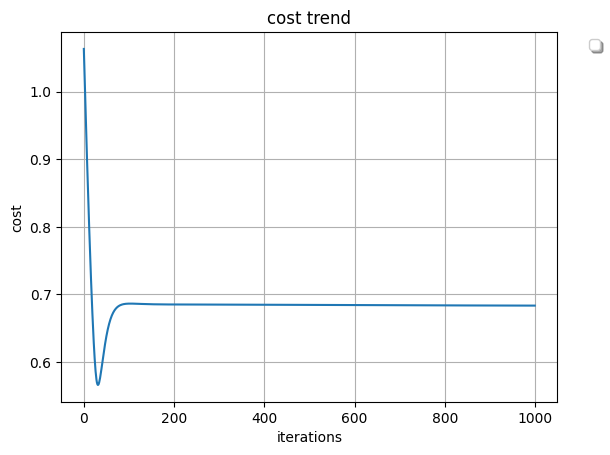

The learned weights are:
[-4.97731515e-01 -2.51188018e-01  2.20377896e-01 -5.11466239e-01
  1.00743872e+00  5.51284103e-01 -2.81397964e-01  4.10846776e-02
  3.82363770e-01  1.88116514e-01  5.95925322e-01  4.34868717e-01
  4.26784269e-01  5.14085719e-01  7.22971903e-01  1.51531485e+00
  1.29231770e+00  1.48101826e-01 -7.98057670e-04  1.25068309e-02
 -3.50079993e-02  1.75636649e-02  2.95081415e-02 -2.26286763e-01
  7.41377730e-02  1.23602632e-01 -1.48558090e-02]


TRAINING RESULTS 

accuracy 0.6513513513513514
recall 0.6951720422867147
precision 0.6672699069286453
f1_score 0.6809352636612471 



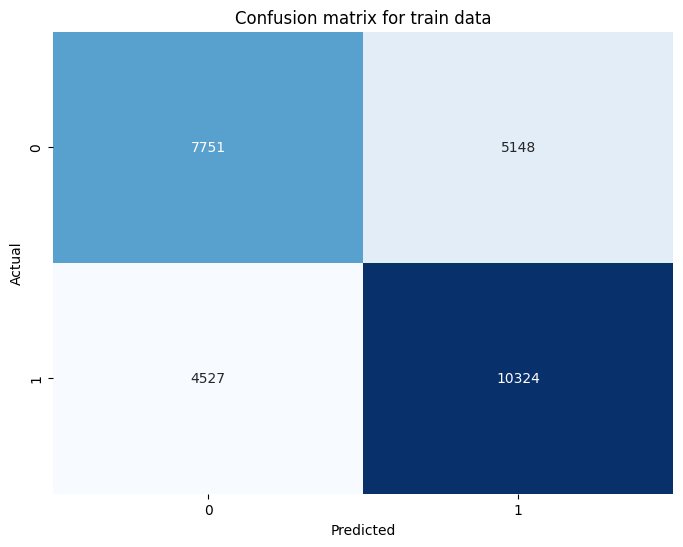

TESTING RESULTS 

accuracy 0.6445266520934925
recall 0.6930033317467873
precision 0.655757393784717
f1_score 0.6738660907127431


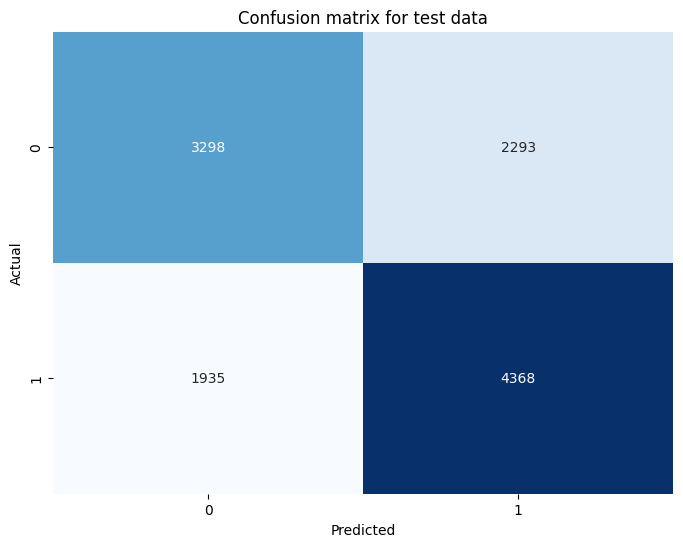

In [90]:
lr1 = LogisticRegression(train_df, test_df,learning_rate=0.00001, epsilon=0.0,  max_iteration=1000)
lr1.fit()
lr1.classification_report()
# lr1.plot()
# lr1.plot3D()
# lr1.scatterPlt()

# Model 2: Naive Bayes

In [91]:
from collections import defaultdict

class NaiveBayes:
    def __init__(self, train_data, test_data):

        #extract numeric and categorical data into two separate dataframes

        self.X_train_cont, self.X_train_cat = self.extract_features(train_data)
        self.y_train = train_data['popularity'].to_numpy()
        self.X_test_cont, self.X_test_cat = self.extract_features(test_data)
        self.y_test = test_data['popularity'].to_numpy()
        self.prior = None
        self.cont_distribution = None
        self.cat_counters = None

    def extract_features(self, data):
        '''
          segregating categorical and numeric features
        '''
        X_cont = []
        X_cat = []
        for col in data.columns:
            if data[col].nunique() <= 2: #if the number of unique values is <2 then its a one-hot encoded column
                X_cat.append(data[col].to_numpy().reshape(-1, 1))
            else:
                X_cont.append(data[col].to_numpy().reshape(-1, 1))
        return np.hstack(X_cont), np.hstack(X_cat)

    def gaussian_fit(self, X):
        '''
          calculate mean and standard deviation for the given feature
        '''
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std

    def single_feature_counter(self, x_j):
        '''
        returns a dictionary of each unique value count in a given column x
        '''
        value, counts = np.unique(x_j, return_counts=True)
        count_dict = defaultdict(int, zip(value, counts))
        return count_dict

    def fit(self):
        '''
          for continous features in the train data calculate the mean and standard deviation of each column for every class
          for categorical features in the train data calculate the value counts of each column of every class
        '''
        self.classes, counts = np.unique(self.y_train, return_counts=True)
        self.prior = counts / sum(counts)

        # Fit Gaussian Naive Bayes for continuous features
        self.cont_distribution = {}
        for class_k in self.classes:
            X_cont = self.X_train_cont[self.y_train == class_k]
            self.cont_distribution[class_k] = np.apply_along_axis(self.gaussian_fit, 0, X_cont)

        # Fit Discrete Naive Bayes for categorical features
        self.cat_counters = {}
        for class_k in self.classes:
            X_cat = self.X_train_cat[self.y_train == class_k]
            self.cat_counters[class_k] = np.apply_along_axis(self.single_feature_counter, 0, X_cat)

            #self.cat_counters structure for class_k = 0
            # 0: {
            #     1: {
            #         1: 3,   # Feature 1: 1 appears 3 times in class 0
            #         2: 1,   # Feature 1: 2 appears 1 time in class 0
            #         3: 2    # Feature 1: 3 appears 2 times in class 0
            #     },
            #     2: {
            #         1: 1,   # Feature 2: 1 appears 1 time in class 1
            #         2: 2,   # Feature 2: 2 appears 2 times in class 1
            #         3: 1    # Feature 2: 3 appears 1 time in class 1
            #     }
            # }

    def gaussian(self, X, mean, std):
        '''
          returns the guassian value of the feature array
        '''
        return np.exp(-(X - mean) ** 2 / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)

    def laplace_smoothing(self, feature_value, feature_count_dict):
        return (feature_count_dict[feature_value] + 1) / (sum(feature_count_dict.values()) + len(feature_count_dict))

    def predict(self, X_cont, X_cat):
        y_pred = []
        for i in range(len(X_cont)):
            scores = {}
            for class_k in self.classes:
                # Calculate likelihood for continuous features. loop through each feature(j) of every record(i)
                cont_likelihood = np.prod([
                    self.gaussian(X_cont[i, j], self.cont_distribution[class_k][0][j], self.cont_distribution[class_k][1][j])
                    for j in range(X_cont.shape[1])
                ])

                # Calculate likelihood for categorical features
                cat_likelihood = np.prod([
                    self.laplace_smoothing(X_cat[i, j], self.cat_counters[class_k][j])
                    for j in range(X_cat.shape[1])
                ])

                posterior = cont_likelihood * cat_likelihood * self.prior[class_k] #multiplu continuous and categorical likelihood with prior
                scores[class_k] = posterior

            y_pred.append(max(scores, key=scores.get))

        return np.array(y_pred)

    def metric_calculation(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum () /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1_score=(2*recall*precision)/(recall+precision)
        return accuracy, precision, recall, f1_score

    def confusion_matrix(self, y_true, y_pred, title):
        # Calculate confusion matrix
        conf_matrix = np.zeros((2, 2))
        for true, pred in zip(y_true, y_pred):
            conf_matrix[int(true), int(pred)] += 1

        # Extract TP, FP, TN, FN from confusion matrix
        TP = conf_matrix[1, 1]
        FP = conf_matrix[0, 1]
        TN = conf_matrix[0, 0]
        FN = conf_matrix[1, 0]

        # Plot confusion matrix
        labels = ['Negative', 'Positive']
        values = np.array([[TN, FP], [FN, TP]]).astype(int)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title("Confusion matrix for {} data".format(title))
        plt.show()

    def classification_report(self):
        y_train_pred = self.predict(self.X_train_cont, self.X_train_cat)
        y_test_pred = self.predict(self.X_test_cont, self.X_test_cat)

        train_accuracy, train_precision, train_recall, train_f1_score = self.metric_calculation(self.y_train, y_train_pred)
        test_accuracy, test_precision, test_recall, test_f1_score = self.metric_calculation(self.y_test, y_test_pred)

        print("TRAINING RESULTS \n")
        print('accuracy {}'.format(train_accuracy))
        print('recall {}'.format(train_recall))
        print('precision {}'.format(train_precision))
        print('f1_score {} \n'.format(train_f1_score))
        self.confusion_matrix(self.y_train, y_train_pred, "train")


        print(25 * '==')
        print("TESTING RESULTS \n")
        print('accuracy {}'.format(test_accuracy))
        print('recall {}'.format(test_recall))
        print('precision {}'.format(test_precision))
        print('f1_score {}'.format(test_f1_score))
        self.confusion_matrix(self.y_test, y_test_pred, "test")




In [92]:
model = NaiveBayes(train_df, test_df)
model.fit()

TRAINING RESULTS 

accuracy 0.9985585585585586
recall 0.9983166116759814
precision 0.998989286436224
f1_score 0.9986528357806816 



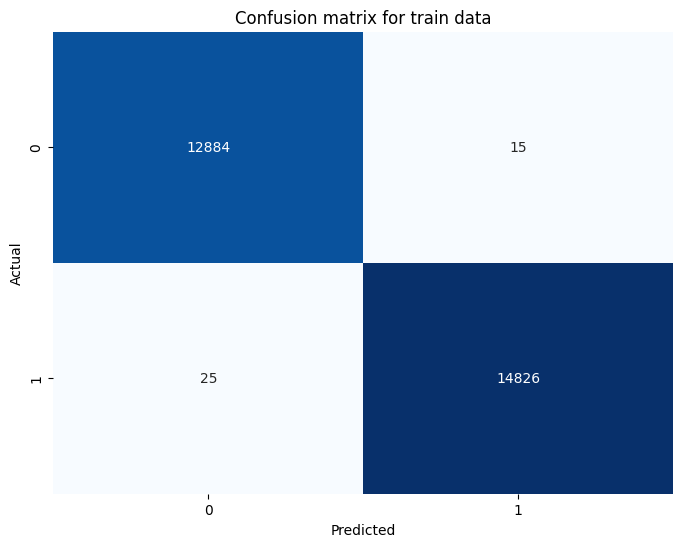

TESTING RESULTS 

accuracy 0.9990751639482092
recall 0.9988894177375853
precision 0.9993650793650793
f1_score 0.9991271919384275


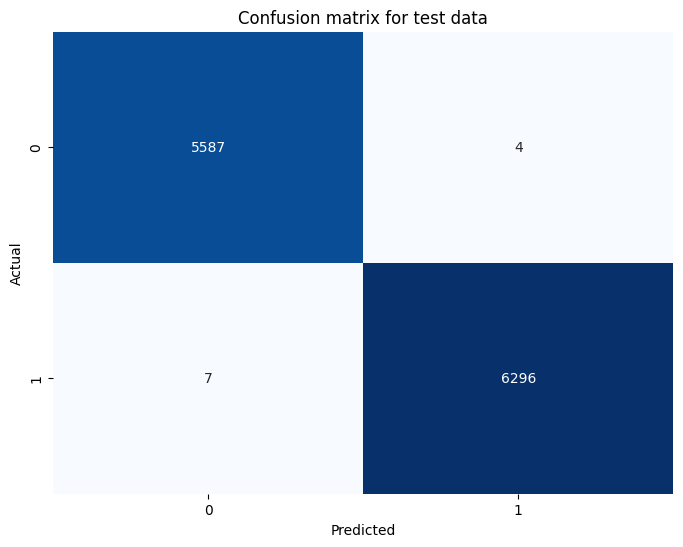

In [93]:
model.classification_report()

# Model 3: Feed forward neural network

In [94]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [95]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [96]:
if torch.backends.mps.is_available():
	device = torch.device("mps")
if torch.cuda.is_available():
	device = torch.device("cuda")
else:
	device = torch.device("cpu")

print(device)

cpu


In [97]:
# extracting feature and predictor variables from the train and test data frame
X_train = train_df.drop('popularity', axis=1).to_numpy()
y_train = train_df['popularity'].to_numpy()
X_test = test_df.drop('popularity', axis=1).to_numpy()
y_test = test_df['popularity'].to_numpy()

# converting vectors to tensors
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))


batch_size = 32

# dataloaders
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [98]:
#creating a feedforward class
class Feedforward(nn.Module):

  def __init__(self,input_size, hidden_size, output_size):
      super(Feedforward, self).__init__()
      # architecture of the neural network
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.fc2 = nn.Linear(hidden_size, output_size)
      self.sigmoid = nn.Sigmoid()

  def forward(self, X):
      # forward pass through the network
      X = self.fc1(X)
      X = self.relu(X)
      X = self.fc2(X)
      X = self.sigmoid(X)
      return X

  def predict(self, X):
      # Perform forward pass for prediction
      return self.forward(X)


  def accuracy(self, pred, label):
      # Compare predictions with labels
      correct = (pred == label).sum().item()  # Convert tensor to Python scalar
      total = len(label)
      accuracy = correct / total
      return accuracy

  def recall(self, pred, label):
      # Recall calculation
      true_positives = ((pred == 1) & (label == 1)).sum().item()
      false_negatives = ((pred == 0) & (label == 1)).sum().item()
      recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
      return recall

  def precision(self, pred, label):
      # Precision calculation
      true_positives = ((pred == 1) & (label == 1)).sum().item()
      false_positives = ((pred == 1) & (label == 0)).sum().item()
      precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
      return precision

  def f1_score(self, pred, label):
      # F1 Score calculation
      true_positives = ((pred == 1) & (label == 1)).sum().item()
      false_positives = ((pred == 1) & (label == 0)).sum().item()
      false_negatives = ((pred == 0) & (label == 1)).sum().item()

      precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
      recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

      f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
      return f1_score

In [99]:
# Define hyperparameters
input_dim_custom = train_data.tensors[0].shape[1]  # number of features
hidden_dim = 128
output_dim = 1
learning_rate = 0.001
epochs = 10

In [100]:
# Create a model object and define the optimizer
model = Feedforward(input_dim_custom, hidden_dim, output_dim)

#moving to gpu or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [101]:
# training the model
model.train()

y_train = []
y_train_pred = []
epoch_tr_loss = []
epoch_tr_acc = []

for epoch in range(epochs):
    current_loss = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model.predict(inputs.float())
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()

        #keep track of loss of current batch
        current_loss.append(loss.item())
        predicted = torch.round(outputs.squeeze())
        y_train.extend(labels.tolist()) #keep track of actual and predicted label in each batch
        y_train_pred.extend(predicted.tolist())

    # convert lists to tensors label and predicted lables
    predictions = torch.tensor(y_train_pred, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32)

    epoch_tr_loss.append(np.mean(current_loss)) #mean loss across all batches for this epoch
    accuracy = model.accuracy(predictions, targets) #accuracy of the epoch
    epoch_tr_acc.append(accuracy)

    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_tr_loss[-1]:.4f}')
    print(f'train_accuracy : {epoch_tr_acc[-1]:.4f}')
    print(25 * '==')



Epoch 1
train_loss : 1.4743
train_accuracy : 0.5508
Epoch 2
train_loss : 0.9242
train_accuracy : 0.5661
Epoch 3
train_loss : 0.9475
train_accuracy : 0.5711
Epoch 4
train_loss : 0.9318
train_accuracy : 0.5757
Epoch 5
train_loss : 0.9681
train_accuracy : 0.5772
Epoch 6
train_loss : 0.8775
train_accuracy : 0.5801
Epoch 7
train_loss : 0.8528
train_accuracy : 0.5820
Epoch 8
train_loss : 0.8562
train_accuracy : 0.5840
Epoch 9
train_loss : 0.8787
train_accuracy : 0.5851
Epoch 10
train_loss : 0.8353
train_accuracy : 0.5863


In [102]:
# model evaluation on test data

def test_evaluate(model, test_loader):
    model.eval()
    device = next(model.parameters()).device  # Get the device model is on

    y_test_pred = []
    y_test = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.float()
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            # squeeze outputs and round predictions
            y_test_pred.extend(torch.round(outputs).squeeze().tolist())
            y_test.extend(labels.tolist())

        # concatenate all batches
        predictions = torch.tensor(y_test_pred, dtype=torch.float32)
        targets = torch.tensor(y_test, dtype=torch.float32)

        # Calculate test accuracy
        test_accuracy = model.accuracy(predictions, targets)

        # Calculate test precision
        test_precision = model.precision(predictions, targets)

        # Calculate test recall
        test_recall = model.recall(predictions, targets)

        # Calculate test F1 score
        test_f1_score = model.f1_score(predictions, targets)


        print(25 * '==')
        print("TESTING RESULTS \n")
        print('accuracy {}'.format(test_accuracy))
        print('recall {}'.format(test_recall))
        print('precision {}'.format(test_precision))
        print('f1_score {}'.format(test_f1_score))

In [103]:
print("Evaluating a feedforward neural network model:")
test_evaluate(model, test_loader)
print(25 * '==')

Evaluating a feedforward neural network model:
TESTING RESULTS 

accuracy 0.6348579115520431
recall 0.6909408218308742
precision 0.6451851851851852
f1_score 0.6672795525932737


# Model 4: SVM

In [104]:
df2_svm=df2.sample(6000)


In [105]:
df2_svm['popularity'] = df2_svm['popularity'].map({0:-1, 1:1})

In [106]:
train_dfsample,test_dfsample=train_test_split(df2_svm,test_size=0.2,stratify=df2_svm['popularity'])

In [107]:
train_dfsample.popularity.value_counts()

popularity
 1    2616
-1    2184
Name: count, dtype: int64

In [108]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class KernelSVM():
    def __init__(self,train_data, test_data, kernel='linear', C=1, max_iter=10):
        self.kernel = kernel
        self.C = C
        self.max_iter = max_iter
        self.X_train = train_data.drop('popularity', axis=1)
        self.y_train = train_data['popularity']
        self.X_test = test_data.drop('popularity', axis=1)
        self.y_test = test_data['popularity']
        self.X_train=self.train_scaling(self.X_train)
        self.X_test=self.test_scaling(self.X_test)
        self.fit()
    # def add_X0(self, X):
    #   return(np.column_stack([np.ones(X.shape[0]),X]))
    def kernel_function(self, X1, X2=None):
      if X2 is None:
          X2 = X1

      if self.kernel == 'linear':
          return np.dot(X1, X2.T)
      elif self.kernel == 'polynomial':
          return (np.dot(X1, X2.T) + 1) ** 2
      elif self.kernel == 'rbf':
          gamma = 1 / X1.shape[1]
          return np.exp(-gamma * np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :]) ** 2, axis=2))
      else:
          raise ValueError('Invalid kernel function. Choose "linear", "polynomial", or "rbf".')
    def train_scaling(self, X):
      '''
      scales only continous features and not one-hot encoded ones
      '''
      columns = X.columns
      self.numeric_cols = [] # to store all the numeric columns
      for col in columns:
          if X[col].nunique() > 2: # columns that are not one-hot encoded columns have more than 2 unique values
            self.numeric_cols.append(col)
      self.mean = np.mean(X[self.numeric_cols],axis = 0)
      self.std = np.std(X[self.numeric_cols], axis = 0)

      # Perform scaling only on valid numerical columns
      X[self.numeric_cols] = (X[self.numeric_cols] - self.mean) / self.std

      # Assuming add_X0 is a function that adds a bias term, add it here if needed
      # X=self.add_X0(X) #updating X with column stacked value
      return X


    def test_scaling(self, X):
      X[self.numeric_cols] = (X[self.numeric_cols] - self.mean) / self.std
      # X = self.add_X0(X)
      return X

    def fit(self):
        X=self.X_train
        y=self.y_train
        self.n, self.d = X.shape

        # Kernel matrix
        self.K = self.kernel_function(X)

        # Dual SVM optimization using SMO
        self.alpha = np.random.rand(self.n) * 2 * self.C - self.C  # Random values between -C and C
        self.b = 0
        tol = 1e-3
        passes = 0
        iter_count = 0
        self.cost_history = []

        while passes < self.n and iter_count < self.max_iter:
            num_changed_alphas = 0
            for i in range(self.n):
                Ei = np.sum(self.alpha * y.values * self.K[:, i]) + self.b - y.values[i]
                if (y.values[i] * Ei < -tol and self.alpha[i] < self.C) or (y.values[i] * Ei > tol and self.alpha[i] > 0):
                    j = np.random.choice([j for j in range(self.n) if j != i])
                    Ej = np.sum(self.alpha * y.values * self.K[:, j]) + self.b - y.values[j]
                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]

                    # Compute the optimal values of alpha_i and alpha_j
                    if y.values[i] != y.values[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[j] + self.alpha[i] - self.C)
                        H = min(self.C, self.alpha[j] + self.alpha[i])
                    if L == H:
                        continue

                    eta = self.K[i, i] + self.K[j, j] - 2 * self.K[i, j]
                    if eta <= 0:
                        continue

                    self.alpha[j] = self.alpha[j] - y.values[j] * (Ei - Ej) / eta
                    self.alpha[j] = max(L, min(H, self.alpha[j]))

                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alpha[i] = self.alpha[i] + y.values[i] * y.values[j] * (alpha_j_old - self.alpha[j])

                    # Update the intercept b
                    b1 = self.b - Ei - y.values[i] * (self.alpha[i] - alpha_i_old) * self.K[i, i] - y.values[j] * (self.alpha[j] - alpha_j_old) * self.K[i, j]
                    b2 = self.b - Ej - y.values[i] * (self.alpha[i] - alpha_i_old) * self.K[i, j] - y.values[j] * (self.alpha[j] - alpha_j_old) * self.K[j, j]
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    num_changed_alphas += 1
            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0
            self.cost_history.append(self.compute_cost(X, y))
            iter_count += 1
    def compute_cost(self, X, y):
        y_pred = self.predict(X)
        cost = np.sum(np.maximum(0, 1 - y * y_pred)) + self.C * np.sum(self.alpha ** 2)
        return cost

    def predict(self, X_new):
        if self.alpha is None or self.b is None:
            raise ValueError("Model not fitted yet. Please call the fit method first.")

        K_new = self.kernel_function(X_new, self.X_train)


        y_pred = np.sign(np.dot(self.alpha, K_new.T) + self.b)
        return y_pred

    def metric_calculation(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f1_score = (2 * recall * precision) / (recall + precision)
        return accuracy, precision, recall, f1_score

    def classification_report(self):
        y_train_pred = self.predict(self.X_train)

        y_test_pred = self.predict(self.X_test)


        train_accuracy, train_precision, train_recall, train_f1_score = self.metric_calculation(self.y_train, y_train_pred)
        test_accuracy, test_precision, test_recall, test_f1_score = self.metric_calculation(self.y_test, y_test_pred)

        print("TRAINING RESULTS \n")
        print('accuracy {}'.format(train_accuracy))
        print('recall {}'.format(train_recall))
        print('precision {}'.format(train_precision))
        print('f1_score {} \n'.format(train_f1_score))

        print("TESTING RESULTS \n")
        print('accuracy {}'.format(test_accuracy))
        print('recall {}'.format(test_recall))
        print('precision {}'.format(test_precision))
        print('f1_score {}'.format(test_f1_score))

        # Plot the cost function
        plt.figure(figsize=(8, 6))
        plt.plot(self.cost_history)
        plt.title('Cost Function')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

        # Plot the confusion matrix
        train_cm = confusion_matrix(self.y_train, y_train_pred, labels=[-1, 1])
        test_cm = confusion_matrix(self.y_test, y_test_pred, labels=[-1, 1])

        plt.figure(figsize=(12, 6))

        ConfusionMatrixDisplay(train_cm, display_labels=[-1, 1]).plot()
        plt.title('Training Confusion Matrix')
        plt.show()

        ConfusionMatrixDisplay(test_cm, display_labels=[-1, 1]).plot()
        plt.title('Testing Confusion Matrix')
        plt.show()

In [109]:
svm = KernelSVM(train_dfsample,test_dfsample,kernel='linear', C=1)

TRAINING RESULTS 

accuracy 0.5379166666666667
recall 0.9644495412844036
precision 0.5428141135972461
f1_score 0.6946585903083698 

TESTING RESULTS 

accuracy 0.5383333333333333
recall 0.963302752293578
precision 0.5431034482758621
f1_score 0.6945975744211688


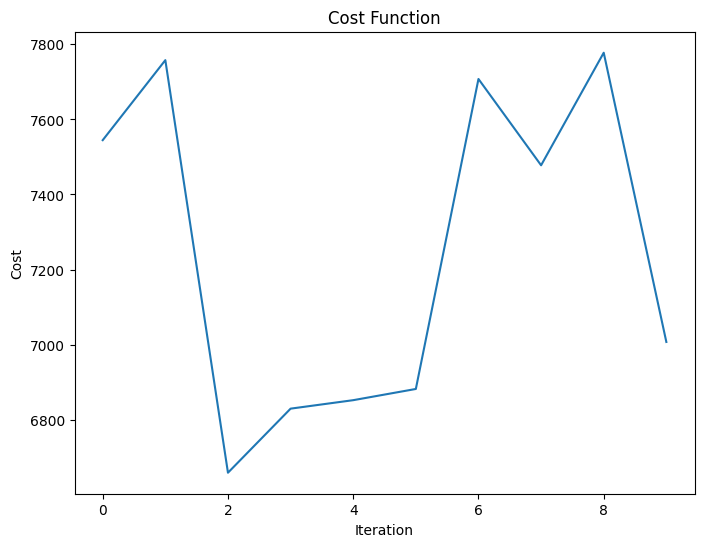

<Figure size 1200x600 with 0 Axes>

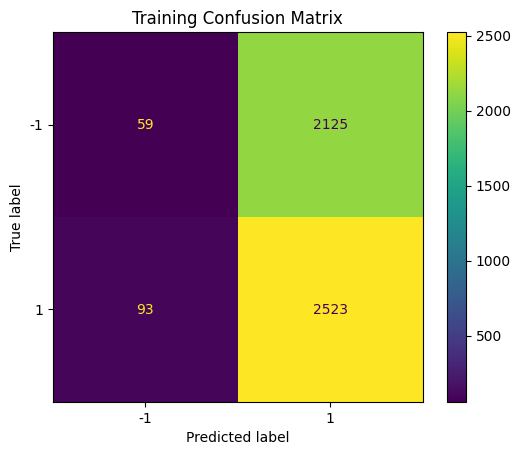

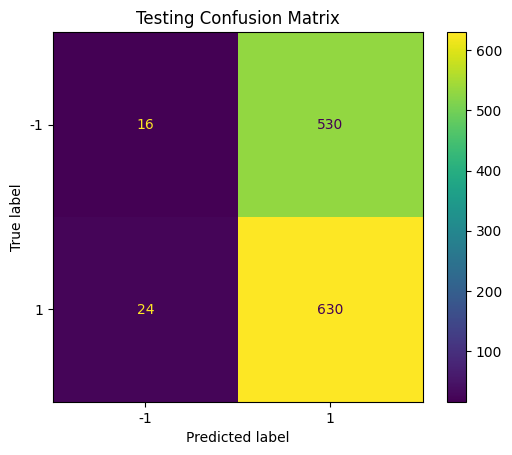

In [110]:
svm.classification_report()